# Table of Contents

* [Library Import](#library)
* [Data Import](#data_import)
* [Check data integrity](#data_check)
    * [No-template controls (NTC's)](#ntc)
    * [Failed samples](#fail)  
    * [Outlier identification with reference genes](#outliers)
    * [Check reference genes](#ref_genes)
    * [Target genes](#target_genes)
        * [Calculate ΔCq & 2^-ΔCq](#delta_Cq)
        * [Plot genes](#target_plots)

# Library import<a class="anchor" id="library"></a>

In [1]:
# pip install jupyterthemes
# pip install scikit_posthocs
# pip install researchpy

In [2]:
# Import libraries
import pandas as pd
from pathlib import Path
import numpy as np
import re

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# Import plot libraries
import matplotlib as mpl
import matplotlib.pyplot as pp
import seaborn as sb

# Set custom design for plots
%matplotlib inline
IPython_default = pp.rcParams.copy()
from matplotlib import rc, cycler
colors = cycler('color',
                ['#941111', #  dark red
                 '#022869', # dark blue
                 '#EE6666', # bright red
                 '#66EEEE', # bright blue  
                 '#9988DD',  # purple
                 '#88BB44']) # green


mpl.rcParams['font.family'] = 'Arial'
params = {'figure.figsize': (14, 12),
         'axes.labelsize': 20,
         'axes.titlesize': 32,
         'xtick.labelsize':18,
         'ytick.labelsize':18,
         'legend.fontsize': 20,
         'legend.title_fontsize': 'xx-large',
         'axes.facecolor': '#FFFFFF',
         'axes.axisbelow': 'True',
         'axes.grid': 'False',
         'axes.prop_cycle': colors,
         'lines.linewidth': 2}
mpl.rcParams.update(params)


# Statistics
from scipy import stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scikit_posthocs as sp
import statsmodels.stats.multicomp as mc
from scipy.stats.mstats import gmean

In [3]:
# mpl.rcParams.keys()

In [4]:
# from matplotlib.ticker import MultipleLocator, FormatStrFormatter, MaxNLocator

In [5]:
# from jupyterthemes import jtplot
# jtplot.style(theme = 'grade3')
# jtplot.style(context='paper', fscale=1.4, spines=False, gridlines='--')
# jtplot.style(ticks=True, grid=False, figsize=(14, 12))
# jtplot.reset()

# Reading in the data <a class="anchor" id="data_import"></a>

Each plate imported as individual csv file.

**Notes:**
- Imported as CSV files in Norwegian, so delimiter is ";" and decimal is "," whereas some files were edited on a US computer, so decimal is still "," but the delimiter is no longer ";".
- Group 1 contains clones (N2 and I1), run in 2020
- Group 2 contains clonse (N13 and I4), run in 2021

- Plates 48, 49, 50 (PRR5 for group 2) failed. 

### Biological Replicate 1 <a class="anchor" id="Biological_Replicate_1"></a>

In [6]:
# Group 1
LHY_1 = pd.read_csv(Path("plate1_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
GAPDH_1 = pd.read_csv(Path("plate2_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
PRR9_1 = pd.read_csv(Path("plate4_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
PRDX_1 = pd.read_csv(Path("plate5_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
MSI1_1 = pd.read_csv(Path("plate6_Cq_Results.csv"), delimiter=";", decimal=",",index_col=1) 
LUX_1 = pd.read_csv(Path("plate19_Cq_Results.csv"), delimiter=";", decimal=",",index_col=1)
PRR7_1 = pd.read_csv(Path("plate21_Cq_Results.csv"), delimiter=";", decimal=",",index_col=1)
PRR5_1 = pd.read_csv(Path("plate24_Cq_Results.csv"), decimal = ",", index_col=1)
RVE8_1 = pd.read_csv(Path("plate27_Cq_Results.csv"), delimiter=";", decimal=",",index_col=1)
TOC1_1 = pd.read_csv(Path("plate30_Cq_Results.csv"), delimiter=";", decimal=",",index_col=1)

# Group 2
LHY_4 = pd.read_csv(Path("plate33_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
GAPDH_4 = pd.read_csv(Path("plate60_Cq_Results.csv"), decimal=",", index_col=1)
PRR9_4 = pd.read_csv(Path("plate39_Cq_Results.csv"), decimal=",", index_col=1)
PRDX_4 = pd.read_csv(Path("plate57_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
MSI1_4 = pd.read_csv(Path("plate45_Cq_Results.csv"), decimal=",",index_col=1) 
LUX_4 = pd.read_csv(Path("plate54_Cq_Results.csv"), decimal=",",index_col=1)
PRR7_4 = pd.read_csv(Path("plate42_Cq_Results.csv"), decimal=",",index_col=1)
RVE8_4 = pd.read_csv(Path("plate36_Cq_Results.csv"), delimiter=";", decimal=",",index_col=1)
TOC1_4 = pd.read_csv(Path("plate51_Cq_Results.csv"), decimal=",",index_col=1)

### Biological Replicate 2 <a class="anchor" id="Biological_Replicate_2"></a>

In [7]:
# Group 1
LHY_2 = pd.read_csv(Path("plate7_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
GAPDH_2 = pd.read_csv(Path("plate8_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
PRR9_2 = pd.read_csv(Path("plate10_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
PRDX_2 = pd.read_csv(Path("plate11_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
MSI1_2 = pd.read_csv(Path("plate12_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
LUX_2 = pd.read_csv(Path("plate20_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
PRR7_2 = pd.read_csv(Path("plate22_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
PRR5_2 = pd.read_csv(Path("plate25_Cq_Results.csv"), decimal = ",", index_col=1)
RVE8_2 = pd.read_csv(Path("plate28_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
TOC1_2 = pd.read_csv(Path("plate31_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)

# Group 2
LHY_5 = pd.read_csv(Path("plate34_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
GAPDH_5 = pd.read_csv(Path("plate61_Cq_Results.csv"), decimal=",", index_col=1)
PRR9_5 = pd.read_csv(Path("plate40_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
PRDX_5 = pd.read_csv(Path("plate58_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
MSI1_5 = pd.read_csv(Path("plate46_Cq_Results.csv"), delimiter=";", decimal=",",index_col=1) 
LUX_5 = pd.read_csv(Path("plate55_Cq_Results.csv"), decimal=",",index_col=1)
PRR7_5 = pd.read_csv(Path("plate43_Cq_Results.csv"), delimiter=";", decimal=",",index_col=1)
RVE8_5 = pd.read_csv(Path("plate37_Cq_Results.csv"), delimiter=";", decimal=",",index_col=1)
TOC1_5 = pd.read_csv(Path("plate52_Cq_Results.csv"), delimiter=";", decimal=",",index_col=1)

### Biological Replicate 3 <a class="anchor" id="Biological_Replicate_3"></a>

In [8]:
# Group 1
LHY_3 = pd.read_csv(Path("plate13_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
GAPDH_3 = pd.read_csv(Path("plate14_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
LUX_3 = pd.read_csv(Path("plate15_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
PRR9_3 = pd.read_csv(Path("plate16_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
PRDX_3 = pd.read_csv(Path("plate17_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
MSI1_3 = pd.read_csv(Path("plate18_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
PRR7_3 = pd.read_csv(Path("plate23_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
PRR5_3 = pd.read_csv(Path("plate26_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
RVE8_3 = pd.read_csv(Path("plate29_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
TOC1_3 = pd.read_csv(Path("plate32_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)

# Group 2
LHY_6 = pd.read_csv(Path("plate35_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
GAPDH_6 = pd.read_csv(Path("plate62_Cq_Results.csv"), decimal=",", index_col=1)
PRR9_6 = pd.read_csv(Path("plate41_Cq_Results.csv"), decimal=",", index_col=1)
PRR9_extra_6 = pd.read_csv(Path("plate50_Cq_Results.csv"), decimal=",", index_col=1)
PRDX_6 = pd.read_csv(Path("plate59_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
MSI1_6 = pd.read_csv(Path("plate47_Cq_Results.csv"), delimiter=";", decimal=",",index_col=1) 
LUX_6 = pd.read_csv(Path("plate56_Cq_Results.csv"), decimal=",",index_col=1)
PRR7_6 = pd.read_csv(Path("plate44_Cq_Results.csv"), decimal=",",index_col=1)
RVE8_6 = pd.read_csv(Path("plate38_Cq_Results.csv"), decimal=",",index_col=1)
TOC1_6 = pd.read_csv(Path("plate53_Cq_Results.csv"), delimiter=";", decimal=",",index_col=1)

### Data merge

In [9]:
genes_br_1 = [LHY_1, GAPDH_1, PRR9_1, PRDX_1, MSI1_1, LUX_1, PRR7_1, PRR5_1, RVE8_1, TOC1_1, LHY_4, RVE8_4, PRR9_4, PRR7_4, MSI1_4, TOC1_4, LUX_4, GAPDH_4, PRDX_4]

genes_br_2 = [LHY_2, GAPDH_2, PRR9_2, PRDX_2, MSI1_2, LUX_2, PRR7_2, PRR5_2, RVE8_2, TOC1_2, LHY_5, RVE8_5, PRR9_5, PRR7_5, MSI1_5, TOC1_5, LUX_5, PRDX_5, GAPDH_5]

genes_br_3 = [LHY_3, GAPDH_3, LUX_3, PRR9_3, PRDX_3, MSI1_3, PRR7_3, PRR5_3, RVE8_3, TOC1_3, LHY_6, RVE8_6, PRR9_6, PRR7_6, MSI1_6, TOC1_6, LUX_6, PRDX_6, GAPDH_6, PRR9_extra_6]

In [10]:
br_1 = pd.concat(genes_br_1)
br_2 = pd.concat(genes_br_2)
br_3 = pd.concat(genes_br_3)

#### Dataframe cleanup

* Drop all unneccessary columns
* Replace Sample "NaN" with "NTC"
* Replace Cq "NaN" with 0
* Replace "GADPH" with "GAPDH" (typo)
* Change Target "IRC" from "GAPDH" to "IRC" for IRC samples

In [11]:
br_1.reset_index(inplace = True)
br_1.drop(['Well', 'Unnamed: 0',
 'Fluor',
 'Content',
 'Biological Set Name',
 'Cq Mean',
 'Cq Std. Dev',
 'Starting Quantity (SQ)',
 'Log Starting Quantity',
 'SQ Mean',
 'SQ Std. Dev',
 'Set Point',
 'Well Note'], axis=1, inplace = True)

# replace sample NaN name's with NTC
br_1["Sample"] = br_1["Sample"].replace(np.nan, "NTC") 

# replace Cq NaN values with 0
br_1["Cq"] = br_1["Cq"].replace(np.nan, 0) 

 # rename misnamed target's
br_1["Target"].replace({"GADPH":"GAPDH", "qMSI1":"MSI1"}, inplace=True)

# set replicate number for future merged dataframe
br_1['Replicate'] = '1' 

# Set order of columns
br_1 = br_1[['Sample', 'Replicate', 'Target', 'Cq']]

#rename IRC targets for separate use
br_1.loc[br_1["Sample"].str.contains("IRC1"), "Target" ] = "IRC1"
br_1.loc[br_1["Sample"].str.contains("IRC2"), "Target" ] = "IRC2"
br_1.loc[br_1["Sample"].str.contains("IRC3"), "Target" ] = "IRC3"


In [12]:
br_1.loc[br_1['Sample'] == 'I4_3B'] 

,Sample,Replicate,Target,Cq
854,I4_3B,1,LHY,28.967996
935,I4_3B,1,RVE8,28.439062
1015,I4_3B,1,PRR9,25.922230
1095,I4_3B,1,PRR7,26.273794
1174,I4_3B,1,MSI1,29.318290
1206,I4_3B,1,MSI1,0.000000
1253,I4_3B,1,TOC1,28.393389
1332,I4_3B,1,LUX,29.706691
1411,I4_3B,1,GAPDH,22.861219
1486,I4_3B,1,PRDX,22.761280


In [13]:
# Plate mistakes: Re-did I4_3B_1 MSI1 (plate 45) in well G7, delete the other cell
br_1.drop(1206, axis=0, inplace = True)

In [14]:
br_2.reset_index(inplace = True)
br_2.drop(['Well', 'Unnamed: 0',
 'Fluor',
 'Content',
 'Biological Set Name',
 'Cq Mean',
 'Cq Std. Dev',
 'Starting Quantity (SQ)',
 'Log Starting Quantity',
 'SQ Mean',
 'SQ Std. Dev',
 'Set Point',
 'Well Note'], axis=1, inplace = True)

# Same transformations as br_1
br_2["Sample"] = br_2["Sample"].replace(np.nan, "NTC")
br_2["Cq"] = br_2["Cq"].replace(np.nan, 0)
br_2["Target"].replace({"GADPH":"GAPDH", "qMSI1":"MSI1"}, inplace=True)
br_2['Replicate'] = '2'
br_2 = br_2[['Sample', 'Replicate', 'Target', 'Cq']]
br_2.loc[br_2["Sample"].str.contains("IRC1"), "Target" ] = "IRC1"
br_2.loc[br_2["Sample"].str.contains("IRC2"), "Target" ] = "IRC2"
br_2.loc[br_2["Sample"].str.contains("IRC3"), "Target" ] = "IRC3"

In [15]:
br_2.loc[850, :]

Sample       I4_2B_1
Replicate          2
Target           NaN
Cq            26.357
Name: 850, dtype: object

In [16]:
# Plate mistakes: Dont need this sample, accidental re-make
br_2.drop(850, axis=0, inplace=True)

In [17]:
br_3.reset_index(inplace = True)
br_3.drop(['Well', 'Unnamed: 0',
 'Fluor',
 'Content',
 'Biological Set Name',
 'Cq Mean',
 'Cq Std. Dev',
 'Starting Quantity (SQ)',
 'Log Starting Quantity',
 'SQ Mean',
 'SQ Std. Dev',
 'Set Point',
 'Well Note'], axis=1, inplace = True)

# Same transformations as br_1
br_3["Sample"] = br_3["Sample"].replace(np.nan, "NTC")
br_3["Cq"] = br_3["Cq"].replace(np.nan, 0)
br_3["Target"].replace({"GADPH":"GAPDH", "qMSI1":"MSI1"}, inplace=True)
br_3['Replicate'] = '3'
br_3 = br_3[['Sample', 'Replicate', 'Target', 'Cq']]
br_3.loc[br_3["Sample"].str.contains("IRC1"), "Target" ] = "IRC1"
br_3.loc[br_3["Sample"].str.contains("IRC2"), "Target" ] = "IRC2"
br_3.loc[br_3["Sample"].str.contains("IRC3"), "Target" ] = "IRC3"

### Group all data in one dataframe

In [18]:
replicates = [br_1, br_2, br_3]
data = pd.concat(replicates, ignore_index = True)
data

,Sample,Replicate,Target,Cq
0,N2_1A,1,LHY,23.972973
1,N2_2A,1,LHY,22.608713
2,N2_1B,1,LHY,22.410477
3,N2_2B,1,LHY,23.546714
4,N2_3A,1,LHY,21.134845
...,...,...,...,...
4489,I4_13D,3,PRR9,30.051217
4490,NTC,3,PRR9,39.440899
4491,IRC1_50,3,IRC1,21.016340
4492,IRC2_50,3,IRC2,21.970216


Pull out IRC's for separate use

In [1]:
data = data[~data.Sample.str.contains('IRC')]

NameError: name 'data' is not defined

Set column names for sample ID variables using dictionary

In [20]:
sampleID_treatment = {"A": "Norway", 
                      "B": "Italy", 
                      "C": "D-Norway", 
                      "D": "D-Italy"}

sampleID_zeitgeber = {"_1": "0", "_2": "4", "_3": "8", 
                      "_4": "12", "_5": "16", "_6": "20", 
                      "_7": "24", "_8": "28", "_9": "32", 
                      "_10": "36", "_11": "40", "_12": "44", 
                      "_13": "48"}

sampleID_Clone = {"I1": "I1", "I4": "I4", "N2": "N2", "N13": "N13"}

In [21]:
data['treatment']= data.Sample.apply(lambda x : 
                                     ''.join([v if k in x  else '' for k,v in sampleID_treatment.items()]))

data['zeitgeber'] = data.Sample.apply(lambda x : 
                                      ''.join([v if k in x  else '' for k,v in sampleID_zeitgeber.items()]))

data['Clone'] = data.Sample.apply(lambda x : 
                                  ''.join([v if k in x  else '' for k,v in sampleID_Clone.items()]))

data.sort_values(by=['Clone', 'treatment'], ascending = (True, False), inplace = True)

In [24]:
data.describe()

,Cq
count,4331.000000
mean,26.586414
std,6.006905
min,0.000000
25%,24.566040
50%,27.513094
75%,29.481043
max,41.931212


# Check data integrity <a class="anchor" id="data_check"></a>

### No-template controls (NTC) <a class="anchor" id="ntc"></a>

Check NTC > 0

(Validate further by melt curves)

In [25]:
data.loc[(data['Sample']=='NTC') & (data['Cq'] > 0)]

,Sample,Replicate,Target,Cq,treatment,zeitgeber,Clone
1025,NTC,1,PRR9,35.105059,D-Norway,,
1048,NTC,1,PRR9,39.139342,D-Norway,,
1262,NTC,1,TOC1,36.279197,D-Norway,,
1495,NTC,1,PRDX,37.749753,D-Norway,,
1715,NTC,2,PRR9,36.559262,D-Norway,,
3454,NTC,3,MSI1,39.274383,D-Norway,,
3887,NTC,3,RVE8,26.898251,D-Norway,,
4082,NTC,3,PRR7,41.931212,D-Norway,,
4162,NTC,3,MSI1,39.286813,D-Norway,,
4402,NTC,3,PRDX,39.010386,D-Norway,,


Cq's > 35 likely primer-dimers.

RVE8 NTC was mislabelled - Sample was re-done on a new plate.

In [26]:
data.loc[(data['Target']=='PRR9') & (data['Cq'] > 35)]

,Sample,Replicate,Target,Cq,treatment,zeitgeber,Clone
1025,NTC,1,PRR9,35.105059,D-Norway,,
1048,NTC,1,PRR9,39.139342,D-Norway,,
1715,NTC,2,PRR9,36.559262,D-Norway,,
4490,NTC,3,PRR9,39.440899,D-Norway,,
236,I1_13B,1,PRR9,35.379026,Italy,048,I1
1728,I1_7B,2,PRR9,38.188996,Italy,24,I1
1749,I1_13B,2,PRR9,35.934719,Italy,048,I1
3267,I1_6B,3,PRR9,35.795134,Italy,20,I1
3291,I1_13B,3,PRR9,36.079640,Italy,048,I1
237,I1_13C,1,PRR9,35.879865,D-Norway,048,I1


In [27]:
data.loc[(data['Target']=='TOC1') & (data['Cq'] > 35)]

,Sample,Replicate,Target,Cq,treatment,zeitgeber,Clone
1262,NTC,1,TOC1,36.279197,D-Norway,,
782,I1_8A,1,TOC1,39.310573,Norway,28,I1
2255,I1_1B,2,TOC1,37.606885,Italy,0,I1
1265,I4_9A,1,TOC1,35.146323,Norway,32,I4
4230,I4_11A,3,TOC1,36.641713,Norway,040,I4
4238,I4_13A,3,TOC1,37.684287,Norway,048,I4
4239,I4_13B,3,TOC1,38.376442,Italy,048,I4
4228,I4_10C,3,TOC1,37.166448,D-Norway,036,I4
4236,I4_12C,3,TOC1,37.933138,D-Norway,044,I4
4240,I4_13C,3,TOC1,39.026467,D-Norway,048,I4


Drop NTC's

In [28]:
data = data[data.Sample != 'NTC']

## Failed wells <a class="anchor" id="fail"></a>

In [29]:
failed_wells = data.loc[data['Cq'] == 0]
failed_wells.sort_values(['Clone', 'Target'])

,Sample,Replicate,Target,Cq,treatment,zeitgeber,Clone
3127,I1_12A,3,GAPDH,0.0,Norway,044,I1
1655,I1_12B,2,GAPDH,0.0,Italy,044,I1
156,I1_13C,1,GAPDH,0.0,D-Norway,048,I1
480,I1_13C,1,LUX,0.0,D-Norway,048,I1
3449,I1_12D,3,MSI1,0.0,D-Italy,044,I1
...,...,...,...,...,...,...,...
3486,N2_11C,3,PRR7,0.0,D-Norway,040,N2
3487,N2_11D,3,PRR7,0.0,D-Italy,040,N2
3647,N2_11D,3,RVE8,0.0,D-Italy,040,N2
764,N2_13B,1,TOC1,0.0,Italy,048,N2


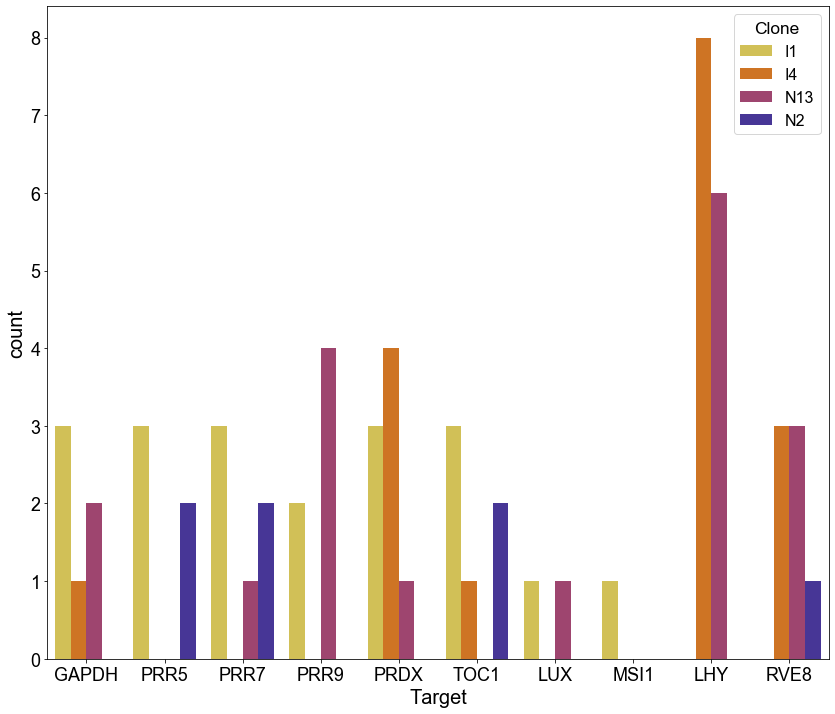

In [30]:
sb.countplot(failed_wells['Target'], hue = failed_wells['Clone'], palette = 'CMRmap_r')
pp.legend(loc='upper right', title = 'Clone', fontsize=16)
pp.savefig('failed_wells.jpg', dpi = 300)
pp.show()

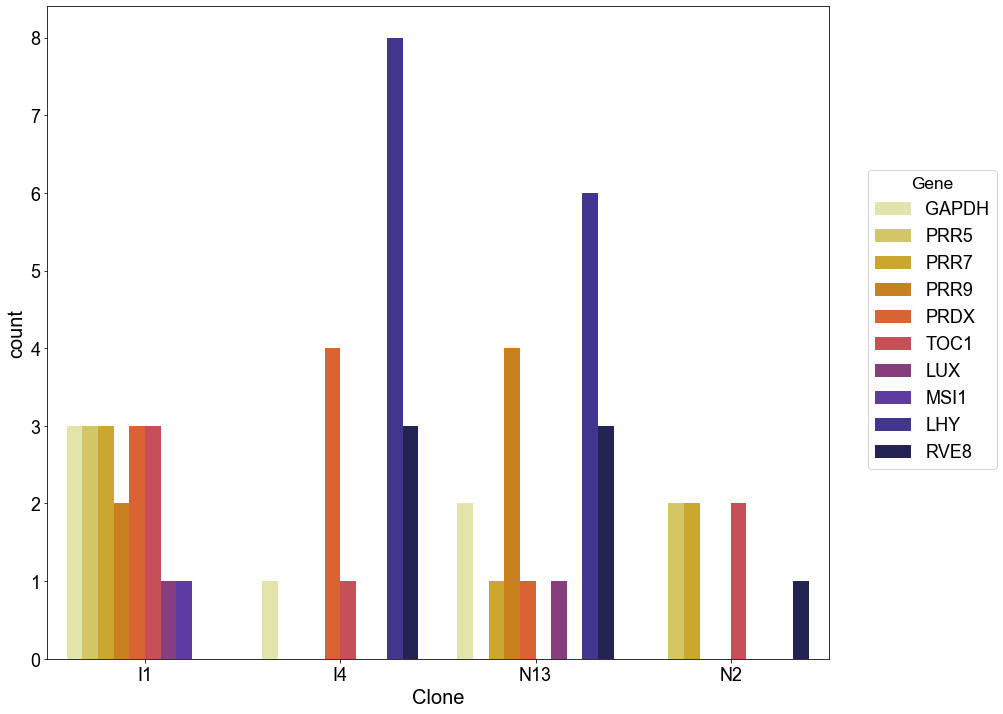

In [31]:
sb.countplot(failed_wells['Clone'], hue = failed_wells['Target'],  palette = 'CMRmap_r')
pp.legend(bbox_to_anchor=(1.05, 0.75), loc=2, borderaxespad=0., title = 'Gene', fontsize=18)

Identify samples where reference gene failed (nothing to compare to, inhibits downstream analysis)

In [32]:
failed_ref = failed_wells.loc[(failed_wells['Target'] == 'MSI1') | (failed_wells['Target'] == 'GAPDH')]
failed_ref

,Sample,Replicate,Target,Cq,treatment,zeitgeber,Clone
3127,I1_12A,3,GAPDH,0.0,Norway,044,I1
1655,I1_12B,2,GAPDH,0.0,Italy,044,I1
156,I1_13C,1,GAPDH,0.0,D-Norway,048,I1
3449,I1_12D,3,MSI1,0.0,D-Italy,044,I1
4482,I4_13D,3,GAPDH,0.0,D-Italy,048,I4
4418,N13_7A,3,GAPDH,0.0,Norway,24,N13
4417,N13_6B,3,GAPDH,0.0,Italy,20,N13


In [33]:
drop_samps = failed_ref[['Sample', 'Replicate']]

Drop failed wells

In [34]:
data = data[data.Cq != 0]

## Identify outliers using reference genes <a class="anchor" id="outliers"></a>

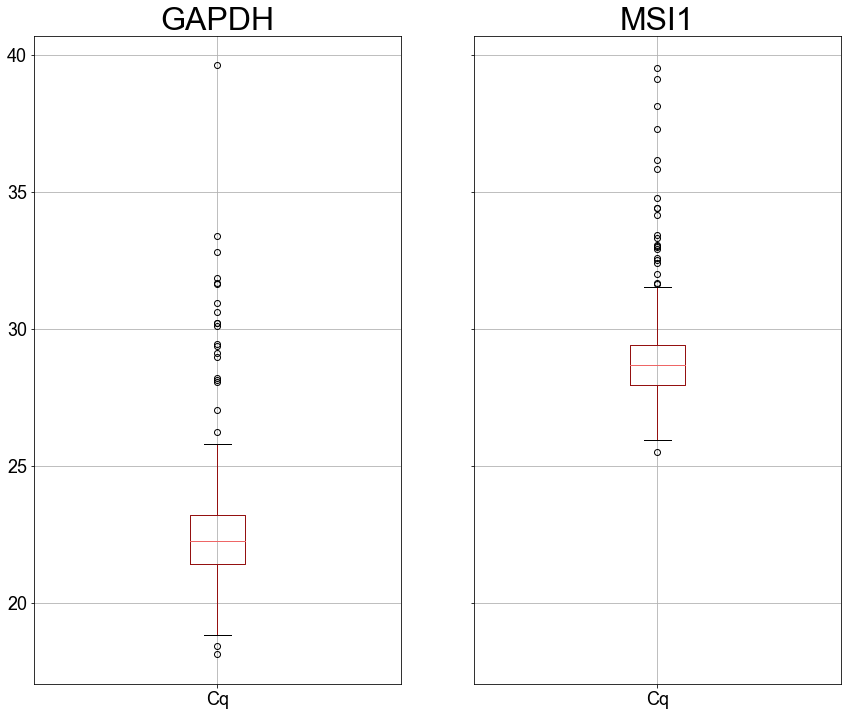

In [35]:
ref_genes = data[(data['Target']=='GAPDH') | (data['Target']=='MSI1')]

ref_genes.groupby('Target').boxplot(column='Cq')
pp.savefig('outliers.jpg', dpi = 300)
pp.show()

In [36]:
bygene = ref_genes.groupby(by='Target')
bygene.describe()

Cq                                                        \
        count       mean       std        min        25%        50%   
Target                                                                
GAPDH   440.0  22.591800  2.217914  18.114577  21.423183  22.265899   
MSI1    445.0  28.892576  1.695956  25.503145  27.960188  28.663441   

                              
              75%        max  
Target                        
GAPDH   23.191409  39.619334  
MSI1    29.391472  39.503811

In [37]:
GAPDH = data[data['Target']=='GAPDH']
MSI1 = data[data['Target']=='MSI1'] 

IQR method

In [38]:
def locate_outlier_IQR(df):
    Q1=df['Cq'].quantile(0.25)
    Q3=df['Cq'].quantile(0.75)
    IQR=Q3-Q1
    outliers = df.loc[(df['Cq']>(Q3+1.5*IQR))]
    return (outliers)

In [39]:
GAPDH_outliers = locate_outlier_IQR(GAPDH)
GAPDH_outliers

,Sample,Replicate,Target,Cq,treatment,zeitgeber,Clone
134,I1_8A,1,GAPDH,28.984997,Norway,28,I1
1626,I1_1A,2,GAPDH,30.201841,Norway,0,I1
1627,I1_1B,2,GAPDH,32.805041,Italy,0,I1
1638,I1_7B,2,GAPDH,29.436695,Italy,24,I1
1423,I4_9A,1,GAPDH,30.084437,Norway,32,I4
1431,I4_11A,1,GAPDH,30.940667,Norway,040,I4
2964,I4_10A,2,GAPDH,31.638719,Norway,036,I4
1428,I4_10B,1,GAPDH,26.242289,Italy,036,I4
2970,I4_11C,2,GAPDH,29.363604,D-Norway,040,I4
4469,I4_10C,3,GAPDH,31.847880,D-Norway,036,I4


In [40]:
MSI1_outliers = locate_outlier_IQR(MSI1)
MSI1_outliers

,Sample,Replicate,Target,Cq,treatment,zeitgeber,Clone
377,I1_8A,1,MSI1,34.160538,Norway,28,I1
1871,I1_1B,2,MSI1,37.285711,Italy,0,I1
1882,I1_7B,2,MSI1,38.120442,Italy,24,I1
399,I1_13C,1,MSI1,39.121616,D-Norway,048,I1
400,I1_13D,1,MSI1,35.847011,D-Italy,048,I1
1171,I4_2A,1,MSI1,32.391904,Norway,4,I4
1186,I4_9A,1,MSI1,36.163812,Norway,32,I4
1194,I4_11A,1,MSI1,32.896792,Norway,040,I4
2664,I4_10A,2,MSI1,32.595807,Norway,036,I4
1191,I4_10B,1,MSI1,33.028914,Italy,036,I4


### Samples to be dropped

Outliers + samples where reference gene failed

In [41]:
High_GAPDH = GAPDH_outliers[['Sample', 'Replicate']]
High_MSI1 = MSI1_outliers[['Sample', 'Replicate']]

drop_refs = pd.concat([High_GAPDH, High_MSI1]).drop_duplicates().reset_index(drop=True)


# Add samples where reference genes failed, nothing to use for relative expression
drop_samples = drop_refs.append(drop_samps).drop_duplicates().reset_index(drop=True)

drop_samples.loc[drop_samples.shape[0]] = ['I4_7B', '2']
drop_samples

,Sample,Replicate
0,I1_8A,1
1,I1_1A,2
2,I1_1B,2
3,I1_7B,2
4,I4_9A,1
5,I4_11A,1
6,I4_10A,2
7,I4_10B,1
8,I4_11C,2
9,I4_10C,3


## Update dataframe

In [42]:
# merge dataframe with dropped samples to identify which are being dropped
data_update = pd.merge(data,drop_samples, on=['Sample', 'Replicate'], 
                 indicator=True, how='outer')

In [43]:
dropped = data_update[data_update['_merge']=='both']
dropped['Sample_ID'] = dropped['Sample'] + dropped['Replicate']
dropped.drop(columns = ['Sample', 'Replicate', '_merge'], inplace = True)
dropped

,Target,Cq,treatment,zeitgeber,Clone,Sample_ID
71,LHY,33.183911,Norway,28,I1,I1_8A1
72,GAPDH,28.984997,Norway,28,I1,I1_8A1
73,PRR9,32.560917,Norway,28,I1,I1_8A1
74,PRDX,29.435356,Norway,28,I1,I1_8A1
75,MSI1,34.160538,Norway,28,I1,I1_8A1
...,...,...,...,...,...,...
3740,PRDX,28.558828,Italy,12,N2,N2_4B3
3741,MSI1,33.062104,Italy,12,N2,N2_4B3
3742,PRR7,31.289686,Italy,12,N2,N2_4B3
3743,PRR5,31.862914,Italy,12,N2,N2_4B3


In [44]:
dropped_grouped = dropped.groupby('Sample_ID')
rp.summary_cont(dropped_grouped)

/Users/corinefaehn/opt/anaconda3/lib/python3.7/site-packages/researchpy/summary.py:151: RuntimeWarning: invalid value encountered in sqrt
  l_ci = lambda x: numpy.mean(x) - (1.960 * (numpy.std(x)/numpy.sqrt(x.count() - 1)))
/Users/corinefaehn/opt/anaconda3/lib/python3.7/site-packages/researchpy/summary.py:154: RuntimeWarning: invalid value encountered in sqrt
  u_ci = lambda x: numpy.mean(x) + (1.960 * (numpy.std(x)/numpy.sqrt(x.count() - 1)))


Cq                                                     
            N       Mean        SD        SE  95% Conf.   Interval
Sample_ID                                                         
I1_12A3     9  27.590546  1.939826  0.646609  26.323193  28.857899
I1_12B2     9  28.351178  3.334431  1.111477  26.172683  30.529673
I1_12D3     9  28.496006  2.417693  0.805898  26.916446  30.075565
I1_13C1     7  37.628873  1.688175  0.638070  36.378255  38.879490
I1_13D1    10  28.960332  3.159424  0.999098  27.002101  30.918564
I1_1A2     10  32.618282  2.394863  0.757322  31.133930  34.102633
I1_1B2      7  35.933996  2.177923  0.823178  34.320568  37.547424
I1_7B2      8  34.939494  3.892940  1.376362  32.241825  37.637164
I1_8A1     10  33.679895  3.429013  1.084349  31.554571  35.805219
I4_10A2     9  34.432881  2.684292  0.894764  32.679144  36.186619
I4_10B1     8  30.900101  3.281522  1.160193  28.626122  33.174079
I4_10C3     7  35.471756  2.236002  0.845129  33.815303  37.128210
I4_11A1     8  34.029960  2.565237  0.906948  32.252341  35.807579
I4_11C2     7  33.949234  2.317045  0.875761  32.232743  35.665725
I4_11D2     8  34.704345  2.907680  1.028020  32.689426  36.719265
I4_12C1     9  32.556063  4.515287  1.505096  29.606075  35.506051
I4_12D1     9  28.965019  2.481931  0.827310  27.343491  30.586547
I4_13D3     6  30.431754  3.534467  1.442940  27.603591  33.259916
I4_2A1      9  30.613717  3.298883  1.099628  28.458447  32.768987
I4_7B2      2  30.930073  7.881470  5.573041  20.006912  41.853233
I4_9A1      8  33.685438  2.246551  0.794276  32.128658  35.242219
N13_11A3    9  29.274703  2.059852  0.686617  27.928933  30.620474
N13_13D3    7  32.733529  3.511705  1.327300  30.132022  35.335037
N13_3B3     8  33.452364  2.263711  0.800343  31.883693  35.021035
N13_6B3     8  29.470195  3.428776  1.212255  27.094174  31.846215
N13_7A3     8  28.094734  3.022867  1.068745  25.999994  30.189474
N13_7B2     3  39.303627  0.450494  0.260093  38.793845  39.813408
N13_7B3     9  32.379087  4.795224  1.598408  29.246208  35.511967
N13_8B3     9  27.517869  2.533525  0.844508  25.862632  29.173105
N13_9B2     8  33.744022  2.481727  0.877423  32.024273  35.463771
N2_4A3      9  28.359069  2.154798  0.718266  26.951267  29.766870
N2_4B3      9  31.405527  2.812454  0.937485  29.568057  33.242997
N2_5A1     10  32.094960  2.201548  0.696191  30.730426  33.459493

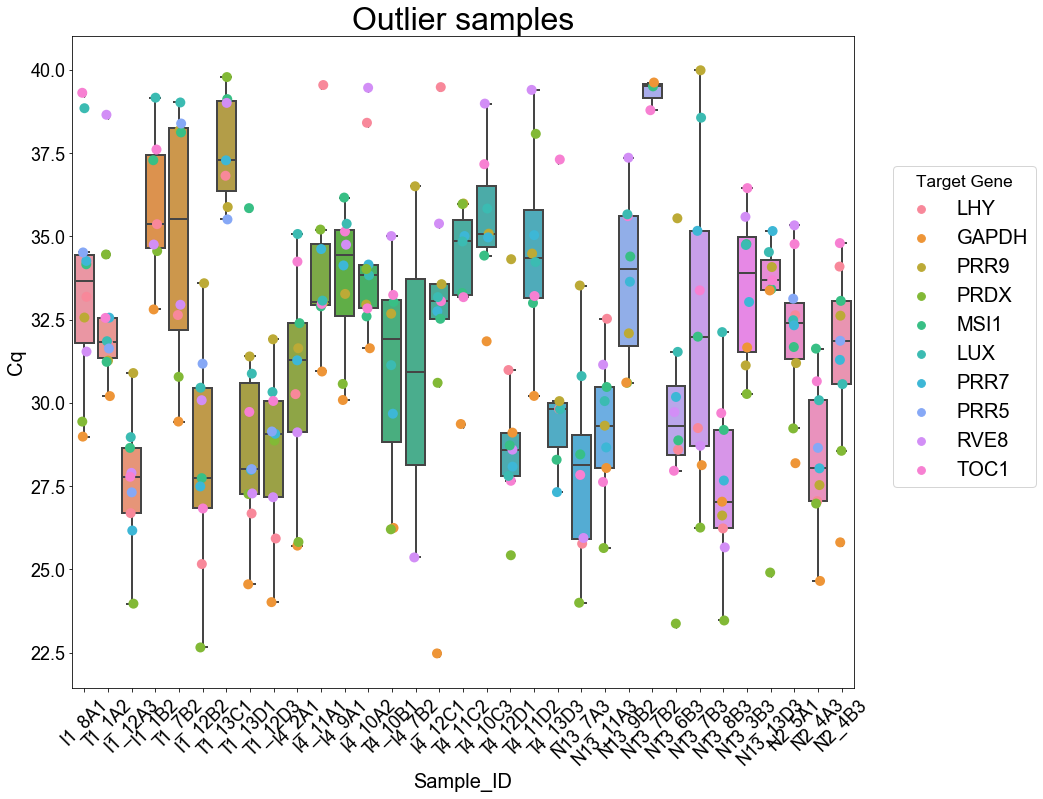

In [45]:
pp.figure()
ax = sb.boxplot(x='Sample_ID', y='Cq', data= dropped) #whis=np.inf
ax = sb.stripplot(x='Sample_ID', y='Cq', data = dropped, jitter=True, hue='Target', size=10) #color = '0.3' for points to be black
pp.xticks(rotation=45)
pp.title('Outlier samples')
ax.legend(bbox_to_anchor=(1.05, 0.8), loc=2, borderaxespad=0., title = 'Target Gene')
pp.show()

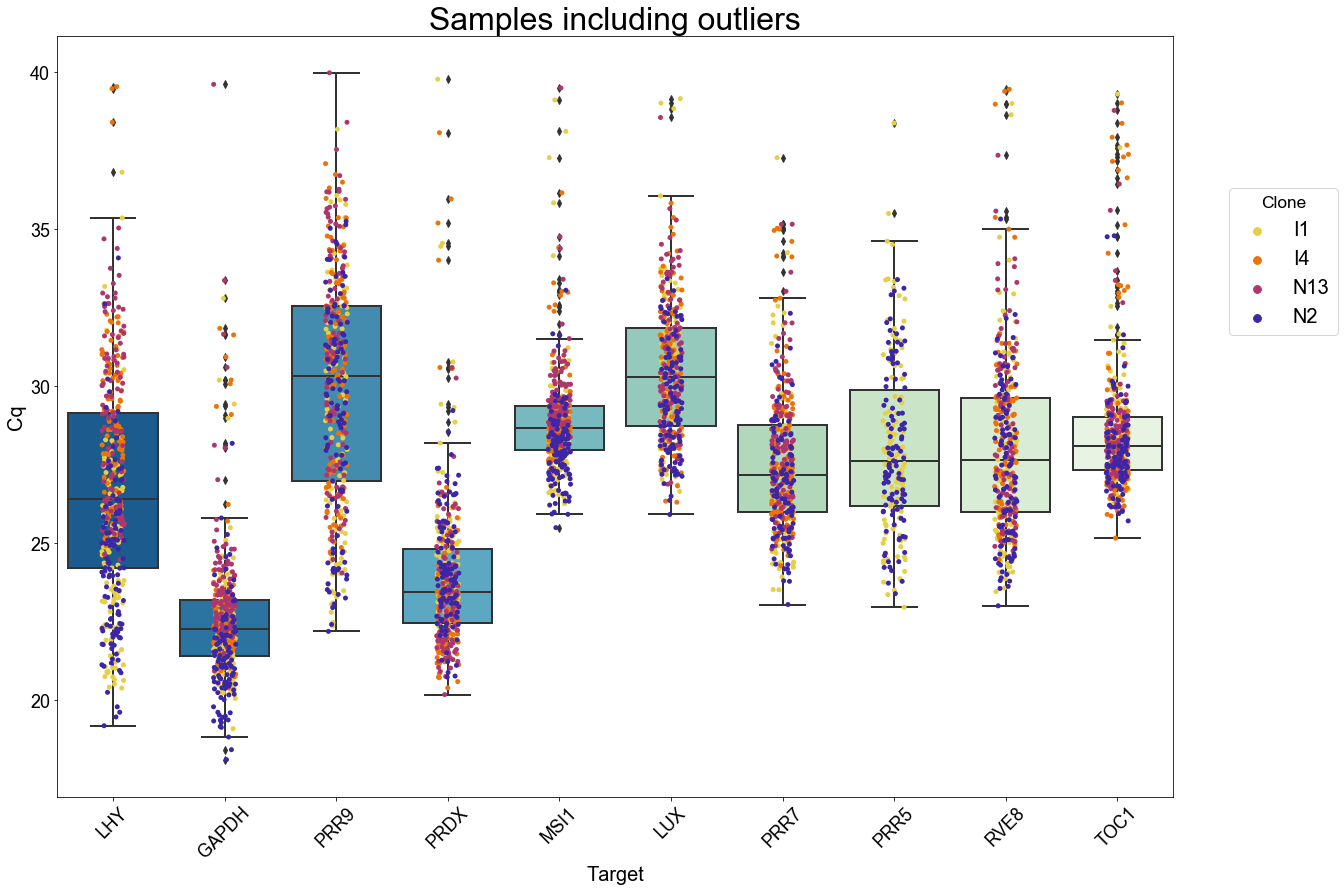

In [46]:
pp.figure(figsize = (20,14))
ax = sb.boxplot(x='Target', y='Cq', data= data, palette = 'GnBu_r')
ax = sb.stripplot(x='Target', y='Cq', data = data, jitter=True, hue='Clone', size=5, palette = 'CMRmap_r') #color = '0.3' for points to be black
pp.xticks(rotation=45)
pp.title('Samples including outliers')
ax.legend(bbox_to_anchor=(1.05, 0.8), loc=2, borderaxespad=0., title = 'Clone')
pp.savefig('Sample_dist_incl_outliers.jpg', dpi=300)
pp.show()

Remove samples from dataframe

In [47]:
remove_index = data_update[data_update['_merge']=='both'].index
data_update.drop(remove_index, inplace = True)
data_update.drop('_merge', axis=1, inplace = True)

Identify any duplicates

In [48]:
data_update.set_index(['Sample', 'Target', 'Replicate'], drop=True, inplace = True)
data_update.head()

Cq treatment zeitgeber Clone
Sample Target Replicate                                     
I1_1A  LHY    1          21.915832    Norway         0    I1
       GAPDH  1          21.834811    Norway         0    I1
       PRR9   1          32.813400    Norway         0    I1
       PRDX   1          22.368548    Norway         0    I1
       MSI1   1          27.725956    Norway         0    I1

In [49]:
data_update[data_update.index.duplicated()]

Cq treatment zeitgeber Clone
Sample Target Replicate                                     
I1_1A  PRR5   1          30.272990    Norway         0    I1
       PRR7   3          27.708206    Norway         0    I1

In [50]:
data_update.reset_index(inplace=True)

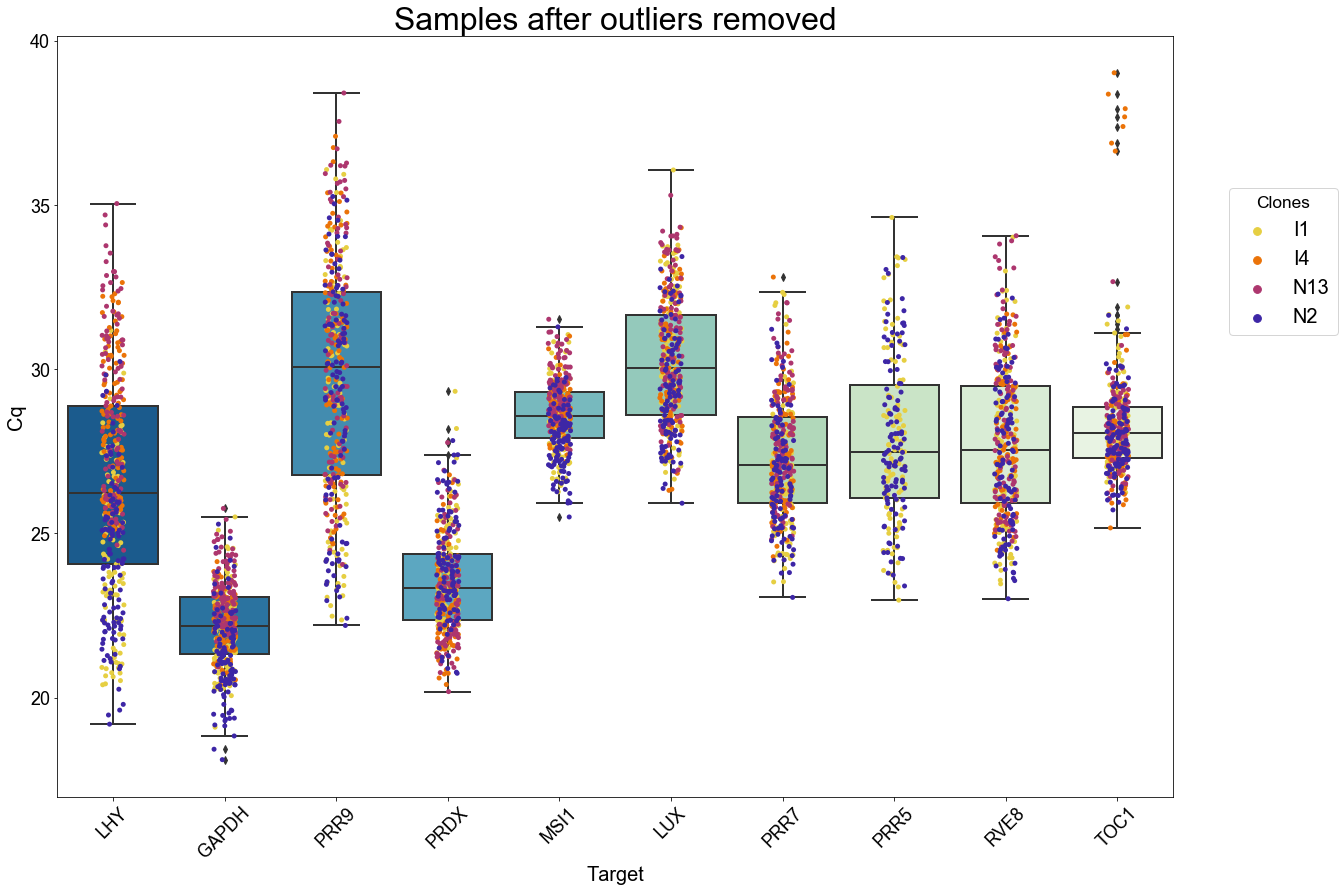

In [51]:
pp.figure(figsize = (20,14))
ax = sb.boxplot(x='Target', y='Cq', data= data_update, palette = 'GnBu_r')
ax = sb.stripplot(x='Target', y='Cq', data = data_update, jitter=True, hue='Clone', size=5, palette = 'CMRmap_r') #color = '0.3' for points to be black
pp.xticks(rotation=45)
pp.title('Samples after outliers removed')
ax.legend(bbox_to_anchor=(1.05, 0.8), loc=2, borderaxespad=0., title = 'Clones')
pp.savefig('Sample_dist_removed_outliers.jpg', dpi=300)
pp.show()

## Check reference genes <a class="anchor" id="ref_genes"></a>

In [52]:
GAPDH = data_update[(data_update['Target']=='GAPDH')]
MSI1 = data_update[(data_update['Target']=='MSI1')] 

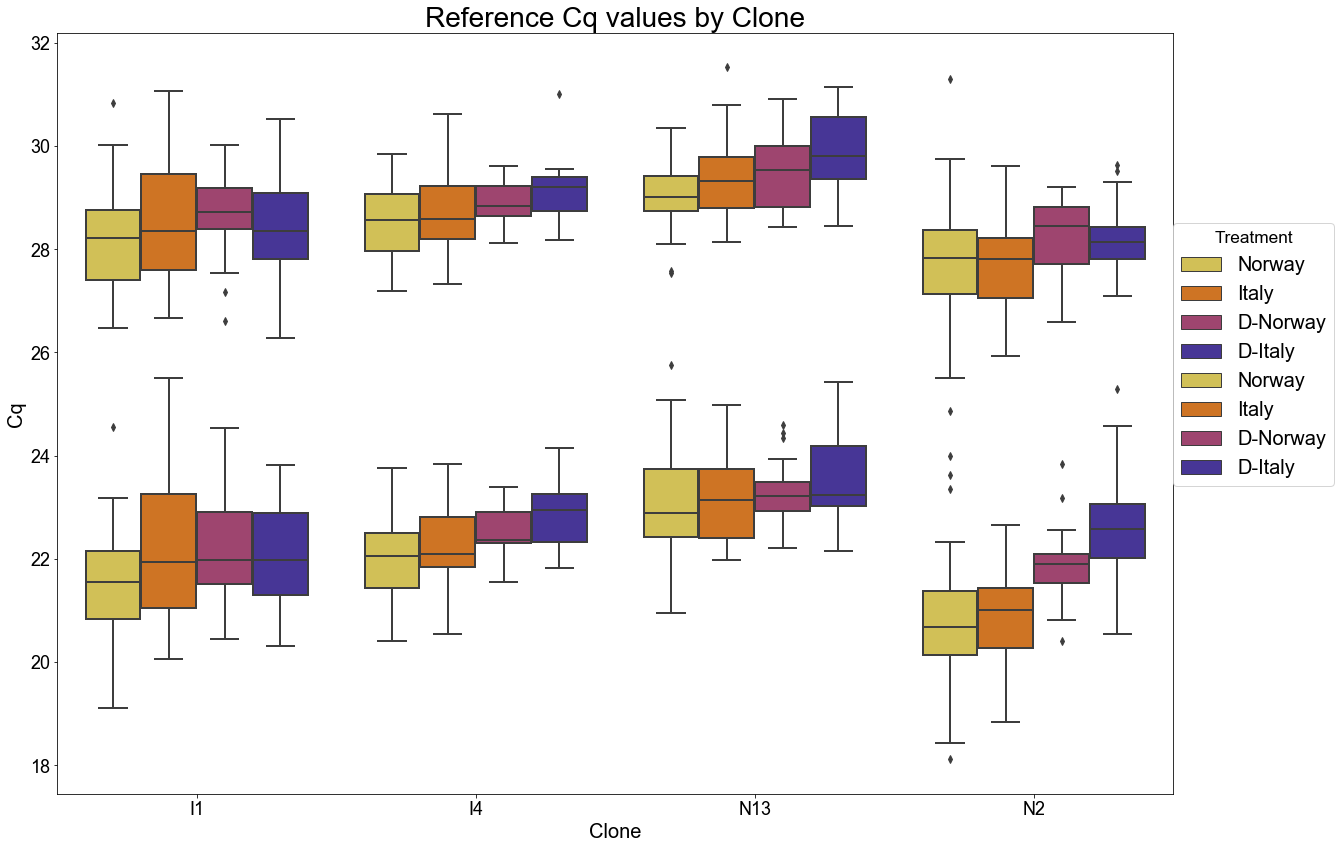

In [53]:
fig = pp.figure(figsize=(20,14))

ax1 = sb.boxplot(x='Clone', y='Cq', hue='treatment',  palette = 'CMRmap_r', data = GAPDH)

ax2 = sb.boxplot(x='Clone', y='Cq', hue='treatment',  palette = 'CMRmap_r', data = MSI1)

pp.legend([],[], frameon=False)
ax2.legend(bbox_to_anchor=(1.0, 0.75), loc=2, borderaxespad=0., title = 'Treatment')

pp.title('Reference Cq values by Clone', fontsize = '28')
pp.savefig('reference_genes_raw_Cq.jpg', dpi = 300)
pp.show()


## Reference gene statistics

### GAPDH

In [54]:
GAPDH_formula = 'Cq ~ C(treatment) + C(Clone) + C(treatment)*C(Clone)'
GAPDH_model = ols(GAPDH_formula, GAPDH).fit()
GAPDH_anova_table = sm.stats.anova_lm(GAPDH_model, typ=2)
GAPDH_anova_table

,sum_sq,df,F,PR(>F)
C(treatment),39.609800,3.0,12.243612,1.117603e-07
C(Clone),197.902090,3.0,61.172649,1.524972e-32
C(treatment):C(Clone),28.438151,9.0,2.930131,2.238464e-03
Residual,429.195250,398.0,NaN,NaN


In [55]:
# Assumption Check - Normality 
GAPDH_res = GAPDH_model.resid
stats.shapiro(GAPDH_model.resid)

(0.9863713383674622, 0.000630443450063467)

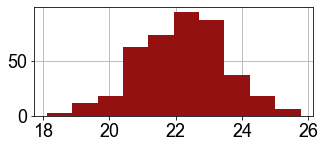

In [56]:
GAPDH['Cq'].hist(figsize=(5,2))

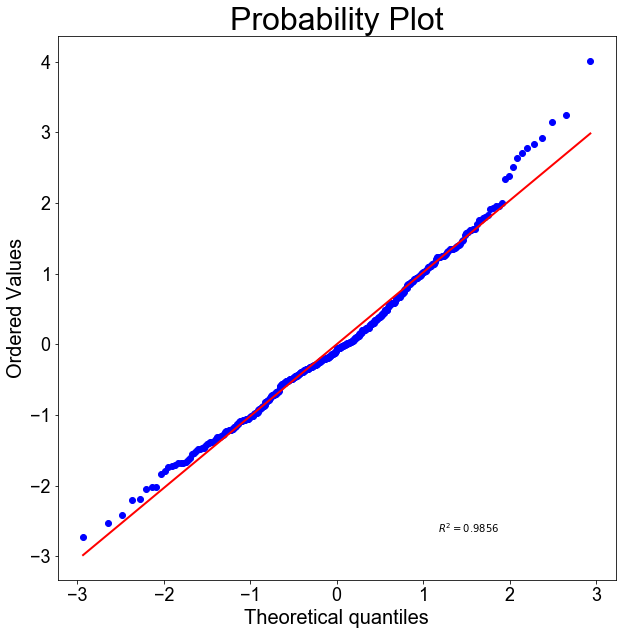

In [57]:
# Assumption Check - Residuals Plot
fig = pp.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

stats.probplot(GAPDH_res, plot=pp,rvalue=True)
pp.show()

In [58]:
GAPDH_groups = GAPDH.Clone.astype(str) + ' ' + GAPDH.treatment.astype(str)

GAPDH_comp = mc.MultiComparison(GAPDH['Cq'], GAPDH_groups)
GAPDH_results = GAPDH_comp.tukeyhsd()
GAPDH_table = pd.DataFrame(data=GAPDH_results._results_table.data[1:], columns=GAPDH_results._results_table.data[0])
GAPDH_sig = GAPDH_table.loc[GAPDH_table['p-adj'] < 0.05, :]
GAPDH_sig

,group1,group2,meandiff,p-adj,lower,upper,reject
7,I1 D-Italy,N13 D-Italy,1.3670,0.0167,0.1197,2.6143,True
13,I1 D-Italy,N2 Italy,-1.2531,0.0061,-2.3204,-0.1859,True
14,I1 D-Italy,N2 Norway,-1.2581,0.0070,-2.3388,-0.1774,True
21,I1 D-Norway,N13 D-Italy,1.3104,0.0236,0.0822,2.5387,True
27,I1 D-Norway,N2 Italy,-1.3097,0.0021,-2.3546,-0.2648,True
28,I1 D-Norway,N2 Norway,-1.3147,0.0024,-2.3733,-0.2561,True
34,I1 Italy,N13 D-Italy,1.2113,0.0098,0.1476,2.2750,True
37,I1 Italy,N13 Norway,0.8719,0.0412,0.0155,1.7283,True
40,I1 Italy,N2 Italy,-1.4089,0.0010,-2.2542,-0.5635,True
41,I1 Italy,N2 Norway,-1.4138,0.0010,-2.2761,-0.5515,True


Significant differences between clones, but also within N2 for D-Italy - Italy and Norway treatment. 

### MSI1

In [59]:
MSI1_formula = 'Cq ~ C(treatment) + C(Clone) + C(treatment)*C(Clone)'
MSI1_model = ols(MSI1_formula, MSI1).fit()
MSI1_anova_table = sm.stats.anova_lm(MSI1_model, typ=2)
MSI1_anova_table

,sum_sq,df,F,PR(>F)
C(treatment),15.192255,3.0,6.300180,3.487206e-04
C(Clone),122.065629,3.0,50.620232,9.830189e-28
C(treatment):C(Clone),6.637079,9.0,0.917459,5.097342e-01
Residual,319.912406,398.0,NaN,NaN


In [60]:
# Assumption Check - Normality 
MSI1_res = MSI1_model.resid
stats.shapiro(MSI1_model.resid)

(0.991313636302948, 0.01572752557694912)

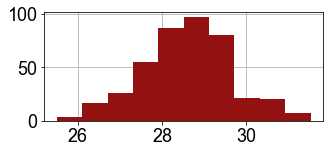

In [61]:
MSI1['Cq'].hist(figsize=(5,2))

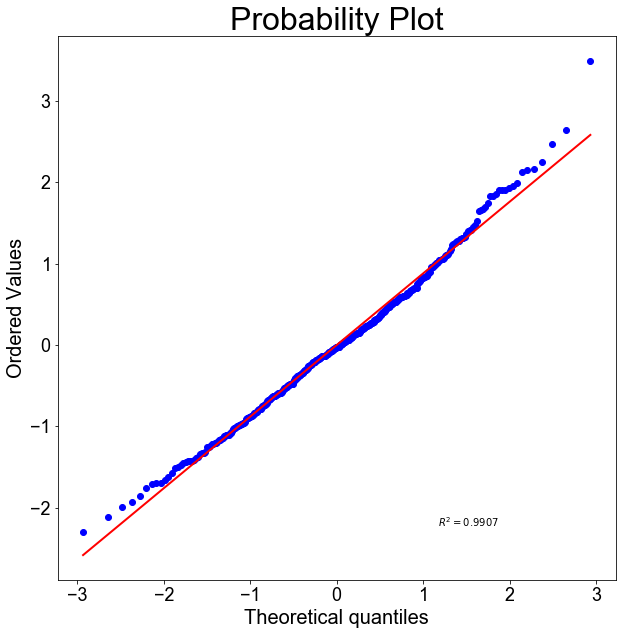

In [62]:
# Assumption Check - Residuals Plot
fig = pp.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

stats.probplot(MSI1_res, plot=pp,rvalue=True)
pp.show()

In [63]:
MSI1_groups = MSI1.Clone.astype(str) + ' ' + MSI1.treatment.astype(str)

MSI1_comp = mc.MultiComparison(MSI1['Cq'], MSI1_groups)
MSI1_results = MSI1_comp.tukeyhsd()
MSI1_table = pd.DataFrame(data=MSI1_results._results_table.data[1:], columns=MSI1_results._results_table.data[0])
MSI1_sig = MSI1_table.loc[MSI1_table['p-adj'] < 0.05, :]
MSI1_sig

,group1,group2,meandiff,p-adj,lower,upper,reject
7,I1 D-Italy,N13 D-Italy,1.5032,0.0010,0.4264,2.5801,True
8,I1 D-Italy,N13 D-Norway,1.1582,0.0213,0.0813,2.2351,True
9,I1 D-Italy,N13 Italy,1.0131,0.0227,0.0665,1.9597,True
21,I1 D-Norway,N13 D-Italy,1.2768,0.0041,0.2164,2.3373,True
27,I1 D-Norway,N2 Italy,-0.9175,0.0416,-1.8196,-0.0154,True
34,I1 Italy,N13 D-Italy,1.2961,0.0010,0.3777,2.2144,True
35,I1 Italy,N13 D-Norway,0.9510,0.0339,0.0327,1.8694,True
36,I1 Italy,N13 Italy,0.8059,0.0260,0.0445,1.5674,True
40,I1 Italy,N2 Italy,-0.8983,0.0028,-1.6281,-0.1684,True
41,I1 Italy,N2 Norway,-0.7878,0.0261,-1.5323,-0.0434,True


Differences in expression of MSI1 between the clones but not within clones, whereas GAPDH differs within clones under the different daylength treatments, so MSI1 should be used as reference for each individual clone. But also could calculate geometric mean and use that as reference?

# Analyze target genes <a class="anchor" id="target_genes"></a>

In [64]:
data2 = data_update.copy()
data2.set_index(["Sample", 'Replicate'], drop=True, inplace = True)
data2

Target         Cq treatment zeitgeber Clone
Sample Replicate                                            
I1_1A  1            LHY  21.915832    Norway         0    I1
       1          GAPDH  21.834811    Norway         0    I1
       1           PRR9  32.813400    Norway         0    I1
       1           PRDX  22.368548    Norway         0    I1
       1           MSI1  27.725956    Norway         0    I1
...                 ...        ...       ...       ...   ...
N2_13D 3           MSI1  28.323940   D-Italy       048    N2
       3           PRR7  25.474186   D-Italy       048    N2
       3           PRR5  26.425477   D-Italy       048    N2
       3           RVE8  25.277144   D-Italy       048    N2
       3           TOC1  27.535871   D-Italy       048    N2

[3914 rows x 5 columns]

In [65]:
Target_groups = rp.summary_cont(data2.groupby(['Target', 'Clone']))
Target_groups

/Users/corinefaehn/opt/anaconda3/lib/python3.7/site-packages/researchpy/summary.py:151: RuntimeWarning: invalid value encountered in sqrt
  l_ci = lambda x: numpy.mean(x) - (1.960 * (numpy.std(x)/numpy.sqrt(x.count() - 1)))
/Users/corinefaehn/opt/anaconda3/lib/python3.7/site-packages/researchpy/summary.py:154: RuntimeWarning: invalid value encountered in sqrt
  u_ci = lambda x: numpy.mean(x) + (1.960 * (numpy.std(x)/numpy.sqrt(x.count() - 1)))


Cq                                                     
                N       Mean        SD        SE  95% Conf.   Interval
Target Clone                                                          
GAPDH  I1     103  22.001300  1.235389  0.121727  21.762716  22.239884
       I4     101  22.288629  0.784186  0.078029  22.135691  22.441567
       N13    102  23.215528  0.919365  0.091031  23.037108  23.393948
       N2     108  21.300068  1.348966  0.129804  21.045652  21.554485
LHY    I1     103  24.399956  2.581632  0.254376  23.901380  24.898533
       I4     100  28.595037  2.089220  0.208922  28.185550  29.004525
       N13    102  28.977947  2.659654  0.263345  28.461791  29.494103
       N2     108  24.168503  2.370455  0.228097  23.721433  24.615573
LUX    I1     102  30.329341  2.001780  0.198206  29.940858  30.717825
       I4     100  30.222996  1.892102  0.189210  29.852144  30.593848
       N13    102  30.852069  1.955160  0.193590  30.472633  31.231505
       N2     107  29.470304  1.700710  0.164414  29.148053  29.792555
MSI1   I1     103  28.413762  1.096339  0.108026  28.202032  28.625493
       I4     101  28.756325  0.705436  0.070194  28.618745  28.893904
       N13    102  29.378423  0.804509  0.079658  29.222293  29.534554
       N2     108  27.895351  0.985915  0.094870  27.709407  28.081296
PRDX   I1     100  24.016242  1.432181  0.143218  23.735535  24.296950
       I4      99  22.854103  1.288424  0.129491  22.600300  23.107907
       N13    102  23.237817  1.616581  0.160065  22.924089  23.551546
       N2     108  24.016023  1.598738  0.153839  23.714499  24.317547
PRR5   I1     102  27.853363  2.673265  0.264693  27.334566  28.372161
       N2     105  27.865146  2.344641  0.228814  27.416671  28.313620
PRR7   I1     103  26.903628  2.039366  0.200945  26.509777  27.297480
       I4     101  27.428379  1.668462  0.166018  27.102983  27.753774
       N13    102  27.989742  1.694600  0.167790  27.660872  28.318611
       N2     105  26.760981  1.709189  0.166800  26.434054  27.087909
PRR9   I1     102  28.840286  3.622535  0.358684  28.137265  29.543307
       I4     101  30.242167  3.204426  0.318852  29.617217  30.867118
       N13    102  30.725234  3.476356  0.344211  30.050581  31.399886
       N2     108  29.066346  3.472071  0.334100  28.411509  29.721182
RVE8   I1     103  27.441949  2.399291  0.236409  26.978587  27.905311
       I4     101  27.866231  1.844440  0.183529  27.506514  28.225947
       N13    101  28.422419  2.556616  0.254393  27.923809  28.921029
       N2     107  27.336855  2.270137  0.219462  26.906708  27.767001
TOC1   I1     102  28.503983  1.224559  0.121249  28.266334  28.741632
       I4     100  28.517905  2.751658  0.275166  27.978580  29.057230
       N13    102  28.257652  1.051363  0.104100  28.053615  28.461689
       N2     106  27.886986  1.115142  0.108312  27.674694  28.099278

In [66]:
pp.figure()
Target_groups.unstack(level=1).plot(kind ='bar', y = ('Cq',      'Mean'))
pp.ylim(21,31)
pp.ylabel('Raw Cq values')
pp.title('Target Gene Mean Cq values')
pp.show()

Mean Cq values for N13 and I4 are higher than N2 and I1 across the board. They were done a year later, but RNA extraction, cDNA synthesis, and qPCR primer master mixes were all made in the same way. Natural error may have occured due to time between extraction. Possibilities include degredation of tissue in -80C for 1 year (not likely), variation in volumes of cDNA synthesis due to pipette errors (possible), variation in qPCR master mix due to volume used/pipette error (l=possible). 

# Transforming final datafrmae

## Calculate ΔCq & 2 <sup>-ΔCq <a class="anchor" id="delta_Cq"></a>

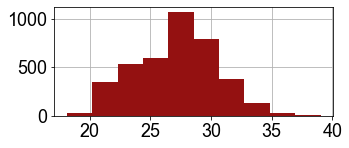

In [67]:
data2['Cq'].hist(figsize=(5,2))

Calculate delta Cq from geometric mean of two reference genes: MSI1 and GAPDH

## ΔCq 

#### Target gene (Cq) - Reference gene (geometric mean of Cq)

In [68]:
def apply_delta_Cq_geom(df, ref1, ref2):
    
    '''Determines delta Cq of each sample based on reference gene geometric mean 
    
    df: Dataframe with index: sample, columns: Target, Cq
    
    ref: reference gene to use for calculation. Must be a string
    
    '''
    ref_gene = df[(df['Target']==ref1) | (df['Target']==ref2)]

    ref_gene.reset_index(inplace=True)
    ref_gene.set_index(['Sample', 'Replicate', 'Target'], inplace = True)
    ref_gene = ref_gene.unstack(level=2)

    # Get geometric mean of reference genes
    ref_gene[(       'Cq', 'gmean')] = gmean([ref_gene[(       'Cq', ref1)], 
                                                            ref_gene[(       'Cq',  ref2)]])
    ref_gene = ref_gene.stack(level=1)
    ref_gene.reset_index(inplace=True)
    ref_gene.set_index(['Sample', 'Replicate'], inplace = True)
    
    # Subtract geometric mean from target Cq values
    df.sort_index(inplace=True)
    d2 = (df.Cq - ref_gene.loc[ref_gene['Target']=='gmean']['Cq'])
    df['delta_Cq'] = d2.values

    return df

In [69]:
apply_delta_Cq_geom(data2, 'GAPDH', 'MSI1')

Target         Cq treatment zeitgeber Clone  delta_Cq
Sample Replicate                                                      
I1_10A 1            LHY  24.282946    Norway       036    I1  0.378490
       1          GAPDH  21.278777    Norway       036    I1 -2.625678
       1           PRR9  24.430283    Norway       036    I1  0.525827
       1           PRDX  22.831522    Norway       036    I1 -1.072934
       1           MSI1  26.854128    Norway       036    I1  2.949672
...                 ...        ...       ...       ...   ...       ...
N2_9D  3           MSI1  28.106467   D-Italy        32    N2  3.788659
       3           PRR7  27.157224   D-Italy        32    N2  2.839416
       3           PRR5  27.408761   D-Italy        32    N2  3.090953
       3           RVE8  24.546936   D-Italy        32    N2  0.229128
       3           TOC1  28.409097   D-Italy        32    N2  4.091289

[3914 rows x 6 columns]

## 2<sup/>-ΔCq 

In [70]:
data2['2delta_Cq'] = data2['delta_Cq'].apply(lambda x: 2 ** -(x))

### Save new dataframe to excel

In [71]:
data2.to_excel('qPCR_data_final.xlsx')

#### Set zeitgeber as index, 0-48

In [72]:
data2.reset_index(inplace=True)
data2.zeitgeber = pd.to_numeric(data2.zeitgeber)
data2.sort_values(["zeitgeber", 'Sample', 'Replicate'], inplace = True)
data2.set_index('zeitgeber', inplace=True)

Drop Reference genes

In [73]:
data2 = data2[data2.Target != 'GAPDH']
data2 = data2[data2.Target != 'MSI1']

## Summarize data

In [74]:
rp.summary_cont(data2.groupby("Replicate")['Cq'])

,N,Mean,SD,SE,95% Conf.,Interval
Replicate,,,,,,
1,1056,27.639954,3.152636,0.097016,27.449713,27.830195
2,1007,27.546936,3.141205,0.098988,27.352824,27.741049
3,1023,27.695004,3.127264,0.097775,27.503272,27.886736


In [75]:
rp.summary_cont(data2.groupby("Replicate")['2delta_Cq'])

,N,Mean,SD,SE,95% Conf.,Interval
Replicate,,,,,,
1,1056,1.138777,2.752016,0.084687,0.972711,1.304843
2,1007,1.465535,4.121896,0.129892,1.210821,1.720250
3,1023,0.870962,1.934619,0.060486,0.752351,0.989574


In [77]:
rp.summary_cont(data2.groupby("Target")['Cq'])

,N,Mean,SD,SE,95% Conf.,Interval
Target,,,,,,
LHY,413,26.485831,3.317386,0.163238,26.165497,26.806165
LUX,411,30.209552,1.946788,0.096028,30.021108,30.397996
PRDX,409,23.540754,1.570425,0.077653,23.388369,23.693139
PRR5,207,27.859340,2.505830,0.174167,27.517145,28.201535
PRR7,411,27.265685,1.843147,0.090916,27.087273,27.444097
PRR9,413,29.707766,3.524659,0.173437,29.367417,30.048115
RVE8,412,27.759024,2.314824,0.114043,27.535227,27.982820
TOC1,410,28.286580,1.691660,0.083545,28.122631,28.450529


In [78]:
rp.summary_cont(data2.groupby("Target")['2delta_Cq'])

,N,Mean,SD,SE,95% Conf.,Interval
Target,,,,,,
LHY,413,1.902958,3.690742,0.181610,1.546571,2.259344
LUX,411,0.060929,0.068538,0.003381,0.054295,0.067563
PRDX,409,5.364812,5.830669,0.288308,4.799036,5.930587
PRR5,207,0.266942,0.319683,0.022220,0.223286,0.310598
PRR7,411,0.397129,0.375252,0.018510,0.360806,0.433453
PRR9,413,0.262754,0.467269,0.022993,0.217634,0.307875
RVE8,412,0.400807,0.482346,0.023763,0.354174,0.447440
TOC1,410,0.175703,0.163293,0.008064,0.159877,0.191528


In [79]:
data2.reset_index(inplace = True)

In [80]:
data2.head()

,zeitgeber,Sample,Replicate,Target,Cq,treatment,Clone,delta_Cq,2delta_Cq
0,0,I1_1A,1,LHY,21.915832,Norway,I1,-2.688863,6.448049
1,0,I1_1A,1,PRR9,32.813400,Norway,I1,8.208705,0.003380
2,0,I1_1A,1,PRDX,22.368548,Norway,I1,-2.236147,4.711370
3,0,I1_1A,1,LUX,30.779054,Norway,I1,6.174359,0.013846
4,0,I1_1A,1,PRR7,28.753618,Norway,I1,4.148923,0.056370


# Plot target genes 2<sup>-ΔCq <a class="anchor" id="target_plots"></a>

In [81]:
data2['Clone_origin'] = data2['Clone'].str.extract(r'([I|N])', expand = False)

In [82]:
data2.tail()

,zeitgeber,Sample,Replicate,Target,Cq,treatment,Clone,delta_Cq,2delta_Cq,Clone_origin
3081,48,N2_13D,3,PRDX,26.258662,D-Italy,N2,1.788823,0.289408,N
3082,48,N2_13D,3,PRR7,25.474186,D-Italy,N2,1.004346,0.498496,N
3083,48,N2_13D,3,PRR5,26.425477,D-Italy,N2,1.955638,0.257807,N
3084,48,N2_13D,3,RVE8,25.277144,D-Italy,N2,0.807304,0.571449,N
3085,48,N2_13D,3,TOC1,27.535871,D-Italy,N2,3.066031,0.119408,N


In [83]:
def plot_gene_clonegroups(df, target_gene):
    
    
    '''Plot data for specified target gene

    Groups data by two treatments (Italy and Norway) including respective dark treatments.
    1. pull data for target 
    2. Groupby treatment
    3. Make separate treatment groups (Norway, D) & (Italy, D) for comparison within treatment
    4. groupby zeitgeber and clone origin (grouped N & I)
    5. get mean and std of 2deltaCq values for groupby
    6. plot those values where
        x = zeitgeber (or clock time)
        y = 2delta_Cq agg. function values from groupby of zeitgeber & clone origin?
    
    :param df: DataFrame
    :param target_gene: gene name to pull from targets
    :return: 2 plots for the separate treatments in 1 figure for specified gene 
    '''  
    # Set figure to have 2 subplots
    fig, (ax1, ax2) = pp.subplots(2, 1, figsize = (12,14)) 
    
    #Pull data for specified target gene from dataframe
    gene_data = df.loc[df['Target']==target_gene] 
    
    #Set label for treatment names for legend
    legend_dict = {'Italy': ' ', 'Norway': ' ', 'D-Italy': '-Dark', 'D-Norway' : '-Dark'}
    
    # Plot Italy on ax1, Norway on ax2
    It = gene_data[gene_data['treatment'].str.contains('Italy')] 
    It_groups = It.groupby('treatment')

    for name, group in It_groups: # name = treatment group = data for treatment
        
        It_result = group.groupby(['zeitgeber', 'Clone_origin']).agg({'2delta_Cq' : ['mean', 'std']}) #groupby sample within treatment
        It_x = It_result.index.levels[0] # Zeitgebers for x-axis
        It_clones = It_result.index.levels[1] # Clones for separate y-values

        for clone in It_clones:
            
            # Pulls mean 2^-Cq for each clone & zeitgeber (y-values)
            It_avg_data = It_result.loc[[(zeitgeber, clone) for zeitgeber in It_x], ('2delta_Cq', 'mean')] 
            # Pulls std of mean 2^-Cq for each clone & zeitgeber 
            It_err_data = It_result.loc[[(zeitgeber, clone) for zeitgeber in It_x], ('2delta_Cq',  'std')] 
            
            # Set label names to legend items for legend 
            label1 = ""
            if name in legend_dict.keys():
                label1 = str(legend_dict[name])
            else: label1= ' '
            
            ## PLOT 
            It_plot = ax1.errorbar(It_x, It_avg_data, yerr = It_err_data, fmt = '-o',
                                   label = str(clone) + str(label1))
            ax1.set_xticks(It_x)
            ax1.set_title('Italy', x=0.05, y=0.9, fontsize = '20')
            ax1.set_ylim(0, gene_data['2delta_Cq'].max())
            ax1.set_ylabel("Relative Expression")     
            
    # Plotting Norway ax2
    No = gene_data[gene_data['treatment'].str.contains('Norway')] 
    No_groups = No.groupby('treatment')
    
    for name, group in No_groups:
        Norway_result = group.groupby(['zeitgeber', 'Clone_origin']).agg({'2delta_Cq' : ['mean', 'std']})
        No_x = Norway_result.index.levels[0]
        No_clones = Norway_result.index.levels[1]

        for clone in No_clones:
            No_avg_data = Norway_result.loc[[(zeitgeber, clone) for zeitgeber in No_x], ('2delta_Cq', 'mean')] 
            No_err_data = Norway_result.loc[[(zeitgeber, clone) for zeitgeber in No_x], ('2delta_Cq',  'std')] 
            
            label2 = ""
            if name in legend_dict.keys():
                label2 = str(legend_dict[name])
            else: label2= ' '
              
            ## PLOT
            No_plot = ax2.errorbar(No_x, No_avg_data, No_err_data, fmt = '-o',
                                  label = str(clone) + str(label2))
            ax2.set_xticks(No_x)
            ax2.set_title('Norway', x=0.05, y=0.9, fontsize = '20')
            ax2.set_xlabel("Zeitgeber")
            ax2.set_ylim(0, gene_data['2delta_Cq'].max())
            ax2.set_ylabel("Relative Expression")
            
    ## LEGEND
    handles, labels = ax1.get_legend_handles_labels()
    ax1.legend(handles[::-1], labels[::-1], 
               borderaxespad=0., bbox_to_anchor=(1.05, 0.25), 
               title='Clone origin', loc = 2)      
 
    fig.suptitle(t = target_gene, fontsize = '36')
    pp.savefig("Circadian_gene_results_figures/" + target_gene + "_expression_clonegrp.png", dpi=300, bbox_inches='tight')
    return fig, (ax1, ax2)


In [84]:
def clone_hist(df, target_gene):
    
    figure = pp.figure(figsize = (10,2))
    target_data = df[df['Target']==target_gene]
    target_data.reset_index(inplace=True)
    
    x1 = target_data.loc[target_data.Clone=='I1', '2delta_Cq']
    x2 = target_data.loc[target_data.Clone=='I4', '2delta_Cq']
    x3 = target_data.loc[target_data.Clone=='N2', '2delta_Cq']
    x4 = target_data.loc[target_data.Clone=='N13', '2delta_Cq']

    kwargs = dict(alpha=0.5, bins=100)

    pp.hist(x1, **kwargs, color='g', label='I1')
    pp.hist(x2, **kwargs, color='b', label='I4')
    pp.hist(x3, **kwargs, color='r', label='N2')
    pp.hist(x4, **kwargs, color='y', label='N13')
    
    pp.gca().set(title='Frequency Histogram of Clones for ' + target_gene + " 2^(-delta Cq) values", ylabel='Frequency')
    pp.legend();
    
    return(pp.show())

In [85]:
def anova_cg(df, target_gene):
    
    target_gene_data = df[df['Target']==target_gene]
    target_gene_data.reset_index(inplace=True)
    
    gene_formula = 'Q("2delta_Cq")' + '~ C(treatment, Sum) + C(zeitgeber, Sum) + C(Clone_origin, Sum) + C(Clone_origin, Sum):C(zeitgeber, Sum) + C(treatment, Sum):C(zeitgeber, Sum) '

    target_gene_model = ols(gene_formula, data=target_gene_data).fit()
    target_gene_aov = sm.stats.anova_lm(target_gene_model, typ=3)
    
    target_gene_groups = 'zt' + target_gene_data.zeitgeber.astype(str) + ', ' + target_gene_data.treatment.astype(str)
    
    ## Too messy. need significant data only if zt are the same.
    
    target_gene_z_comp = mc.MultiComparison(target_gene_data['2delta_Cq'], target_gene_groups)
    target_gene_z_ph = target_gene_z_comp.tukeyhsd()
    target_gene_table = pd.DataFrame(data=target_gene_z_ph._results_table.data[1:], columns=target_gene_z_ph._results_table.data[0])
    target_gene_sig = target_gene_table.loc[target_gene_table['p-adj'] < 0.05, :]
    
    return(target_gene_sig)

In [86]:
data2.tail()

,zeitgeber,Sample,Replicate,Target,Cq,treatment,Clone,delta_Cq,2delta_Cq,Clone_origin
3081,48,N2_13D,3,PRDX,26.258662,D-Italy,N2,1.788823,0.289408,N
3082,48,N2_13D,3,PRR7,25.474186,D-Italy,N2,1.004346,0.498496,N
3083,48,N2_13D,3,PRR5,26.425477,D-Italy,N2,1.955638,0.257807,N
3084,48,N2_13D,3,RVE8,25.277144,D-Italy,N2,0.807304,0.571449,N
3085,48,N2_13D,3,TOC1,27.535871,D-Italy,N2,3.066031,0.119408,N


In [87]:
def treatment_ttest_cg(df, target_gene):


    gene_data = df[df['Target']== target_gene]
    # gene_data.reset_index(inplace=True)

    gene_stats = gene_data.groupby(["zeitgeber", "Clone_origin"]).apply(lambda gene_data:
                                                               stats.ttest_ind(gene_data.loc[gene_data['treatment'] == 'Norway']['2delta_Cq'], 
                                                                              gene_data.loc[gene_data['treatment'] == 'Italy']['2delta_Cq']))

    gene_stats= gene_stats.to_frame()
    gene_stats.columns = ["Value"]
    gene_stats= pd.DataFrame(gene_stats['Value'].to_list(), columns=['Ttest_ind','p-value'], index = gene_stats.index)
    gene_sig = gene_stats.loc[gene_stats["p-value"] < 0.05]
    # gene_sig.to_excel("Circadian_gene_results_statistics/Significant_treatments_" + target_gene + ".xlsx")
    
    print("Significant difference between Norwegian and Italian treatments for " + target_gene + " by latitudinal origin")
    return(gene_sig)

For loop to do for all genes then append to a dataset?

In [89]:
def dark_norway_ttest_cg(df, target_gene):


    gene_data = df[df['Target']== target_gene]
    # gene_data.reset_index(inplace=True)

    gene_stats = gene_data.groupby(["zeitgeber", "Clone_origin"]).apply(lambda gene_data:
                                                               stats.ttest_ind(gene_data.loc[gene_data['treatment'] == 'Norway']['2delta_Cq'], 
                                                                              gene_data.loc[gene_data['treatment'] == 'D-Norway']['2delta_Cq']))

    gene_stats= gene_stats.to_frame()
    gene_stats.columns = ["Value"]
    gene_stats= pd.DataFrame(gene_stats['Value'].to_list(), columns=['Ttest_ind','p-value'], index = gene_stats.index)
    gene_sig = gene_stats.loc[gene_stats["p-value"] < 0.05]
    # gene_sig.to_excel("Circadian_gene_results_statistics/Significant_dark_norway_" + target_gene + ".xlsx")
    
    print("Significant difference between Norwegian and Dark treatments for " + target_gene + " by latitudinal origin")
    return(gene_sig)

In [90]:
def dark_italy_ttest_cg(df, target_gene):


    gene_data = df[df['Target']== target_gene]
    gene_data.reset_index(inplace=True)

    gene_stats = gene_data.groupby(["zeitgeber", "Clone_origin"]).apply(lambda gene_data:
                                                               stats.ttest_ind(gene_data.loc[gene_data['treatment'] == 'Italy']['2delta_Cq'], 
                                                                              gene_data.loc[gene_data['treatment'] == 'D-Italy']['2delta_Cq']))

    gene_stats= gene_stats.to_frame()
    gene_stats.columns = ["Value"]
    gene_stats= pd.DataFrame(gene_stats['Value'].to_list(), columns=['Ttest_ind','p-value'], index = gene_stats.index)
    gene_sig = gene_stats.loc[gene_stats["p-value"] < 0.05]
    # gene_sig.to_excel("Circadian_gene_results_statistics/Significant_dark_italy_" + target_gene + ".xlsx")
    
    print("Significant difference between Italian and Dark treatments for " + target_gene + " by latitudinal origin")
    return(gene_sig)

In [91]:
def clone_ttest(df, target_gene):


    gene_data = df[df['Target']== target_gene]
    gene_data.reset_index(inplace=True)

    gene_stats = gene_data.groupby(["zeitgeber", "treatment"]).apply(lambda gene_data:
                                                               stats.ttest_ind(gene_data.loc[gene_data['Clone_origin'] == 'I']['2delta_Cq'], 
                                                                              gene_data.loc[gene_data['Clone_origin'] == 'N']['2delta_Cq']))

    gene_stats= gene_stats.to_frame()
    gene_stats.columns = ["Value"]
    gene_stats= pd.DataFrame(gene_stats['Value'].to_list(), columns=['Ttest_ind','p-value'], index = gene_stats.index)
    gene_sig = gene_stats.loc[gene_stats["p-value"] < 0.05]
    # gene_sig.to_excel("Circadian_gene_results_statistics/Significant_byclone_" + target_gene + ".xlsx")
    
    print("Significant differences between Italian and Norwegian clones for " + target_gene)
    return(gene_sig)

In [113]:
def display_significant_t_tests(df, target_gene):
    
    display(treatment_ttest_cg(df, target_gene))
    display(clone_ttest(df, target_gene))
    display(dark_norway_ttest_cg(df, target_gene))
    display(dark_italy_ttest_cg(df, target_gene))

## LHY

(<Figure size 864x1008 with 2 Axes>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x7fb94bba5ed0>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7fb942aec4d0>))

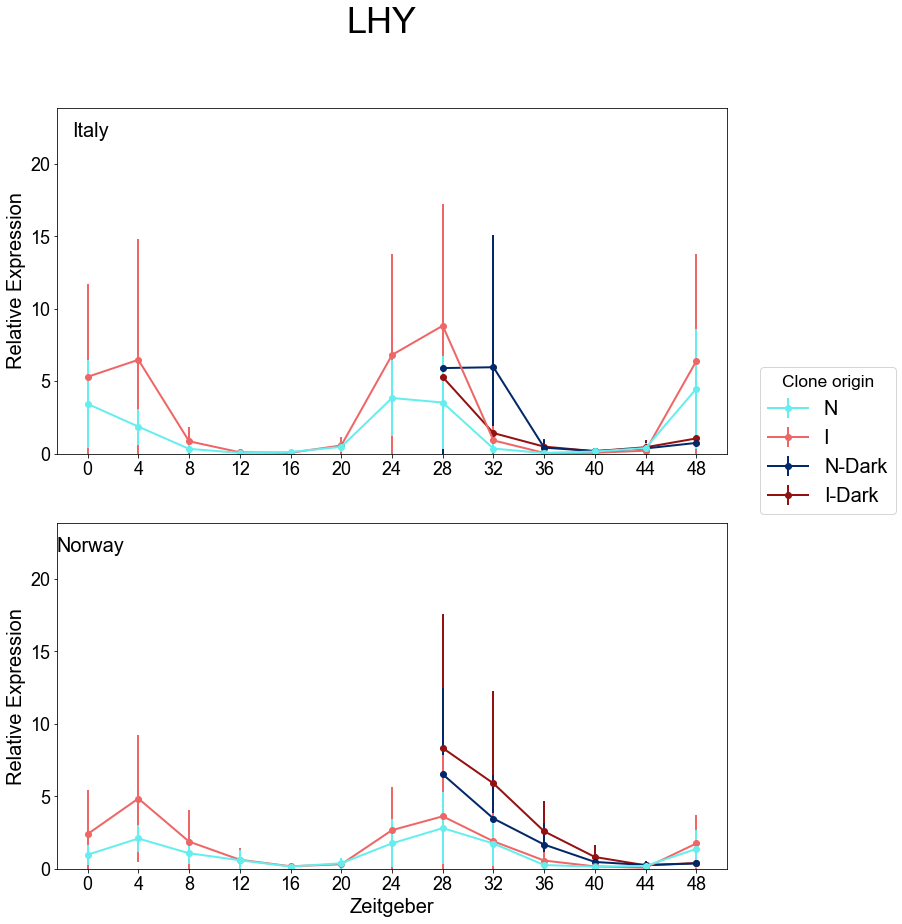

In [92]:
plot_gene_clonegroups(data2, 'LHY')

In [93]:
# anova_cg(data2, 'LHY')

In [133]:
display_significant_t_tests(data2, 'LHY')

Significant difference between Norwegian and Italian treatments for LHY by latitudinal origin


,,Ttest_ind,p-value
zeitgeber,Clone_origin,,
36,N,2.682154,0.025117


Significant differences between Italian and Norwegian clones for LHY


,,Ttest_ind,p-value
zeitgeber,treatment,,


Significant difference between Norwegian and Dark treatments for LHY by latitudinal origin


,,Ttest_ind,p-value
zeitgeber,Clone_origin,,


Significant difference between Italian and Dark treatments for LHY by latitudinal origin


,,Ttest_ind,p-value
zeitgeber,Clone_origin,,


NoneType

## RVE8

(<Figure size 864x1008 with 2 Axes>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x7fb9429e5990>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7fb942e13510>))

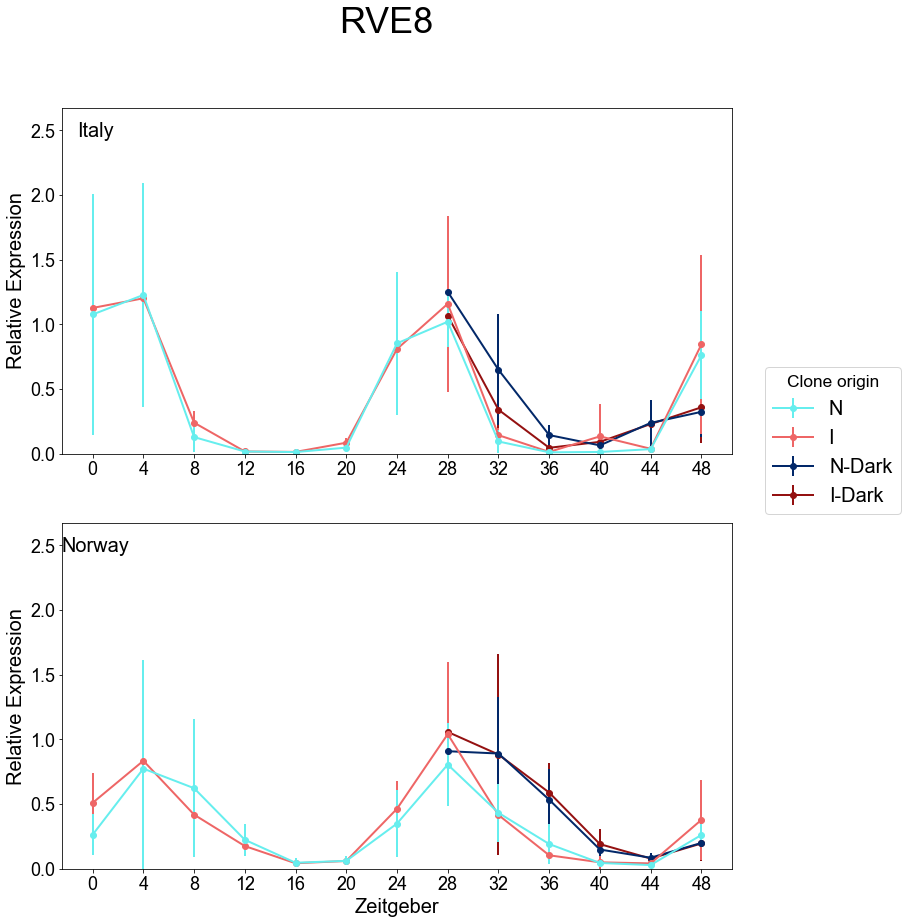

In [98]:
plot_gene_clonegroups(data2, 'RVE8')

In [99]:
RVE8_data = data2[data2['Target']=='RVE8']
rp.summary_cont(RVE8_data['2delta_Cq'].groupby(RVE8_data['Clone']))

,N,Mean,SD,SE,95% Conf.,Interval
Clone,,,,,,
I1,103,0.450470,0.553848,0.054572,0.342985,0.557954
I4,101,0.356975,0.370969,0.036913,0.284265,0.429685
N13,101,0.511125,0.593726,0.059078,0.394754,0.627495
N2,107,0.290243,0.341137,0.032979,0.225300,0.355186


In [115]:
display_significant_t_tests(data2, 'RVE8')

Significant difference between Norwegian and Italian treatments for RVE8 by latitudinal origin


Ttest_ind   p-value
zeitgeber Clone_origin                     
0         I             -2.904482  0.019755
8         I              2.348666  0.040733
12        I              5.592347  0.000230
          N              3.703771  0.006010
16        I              2.892123  0.016049
          N              2.301557  0.046880
32        I              3.594158  0.005801
          N              3.166813  0.011424
36        I              6.659323  0.000288
          N              2.619743  0.030663
40        N              2.857938  0.018844
48        N             -3.487059  0.005852

Significant differences between Italian and Norwegian clones for RVE8


,,Ttest_ind,p-value
zeitgeber,treatment,,
36,D-Italy,-2.729183,0.021223


Significant difference between Norwegian and Dark treatments for RVE8 by latitudinal origin


Ttest_ind   p-value
zeitgeber Clone_origin                     
32        N             -2.285880  0.045330
36        I             -4.704860  0.001532
          N             -2.766285  0.021886
40        I             -2.509722  0.036387
          N             -3.245032  0.011788
44        N             -4.058265  0.002293

Significant difference between Italian and Dark treatments for RVE8 by latitudinal origin


Ttest_ind   p-value
zeitgeber Clone_origin                     
32        I             -2.420979  0.036001
          N             -2.810270  0.020368
36        N             -3.725043  0.004734
40        N             -4.231596  0.002201
44        I             -7.895468  0.000099
          N             -2.780492  0.019434
48        N              2.539339  0.031745

## PRR9

(<Figure size 864x1008 with 2 Axes>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x7fb942d9d0d0>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7fb9426eaa10>))

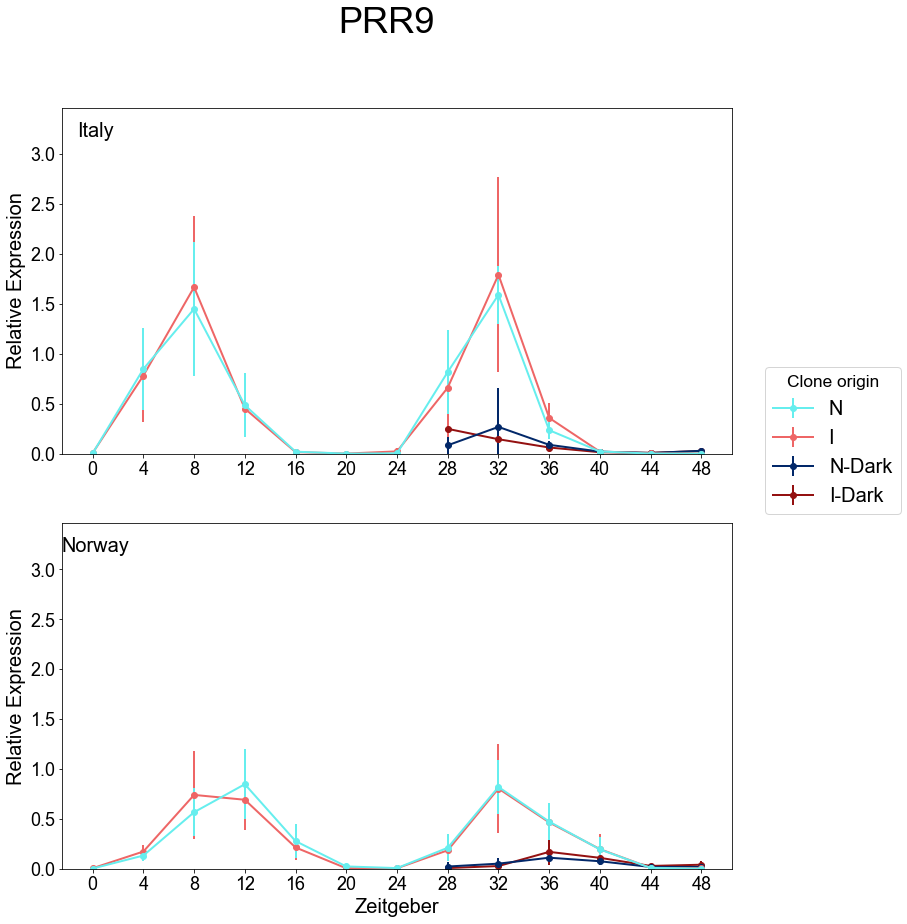

In [104]:
plot_gene_clonegroups(data2, 'PRR9')

In [116]:
display_significant_t_tests(data2, 'PRR9')

Significant difference between Norwegian and Italian treatments for PRR9 by latitudinal origin


Ttest_ind   p-value
zeitgeber Clone_origin                     
4         I             -2.910530  0.019573
          N             -4.262422  0.002104
8         I             -2.706667  0.022059
          N             -3.040074  0.014016
16        I              3.845467  0.003236
          N              3.824103  0.004064
20        I              4.961209  0.000569
28        N             -3.337442  0.008695
32        N             -4.580446  0.001327
36        N              2.794950  0.020884
40        I              2.851461  0.019044
          N              3.297148  0.009272
44        I              4.602683  0.002476
          N              5.276923  0.000359
48        I              2.805118  0.018630
          N              2.366492  0.039513

Significant differences between Italian and Norwegian clones for PRR9


,,Ttest_ind,p-value
zeitgeber,treatment,,


Significant difference between Norwegian and Dark treatments for PRR9 by latitudinal origin


Ttest_ind   p-value
zeitgeber Clone_origin                     
28        I              4.148041  0.002492
          N              3.273916  0.008375
32        I              4.353134  0.001842
          N              6.920696  0.000041
36        I              3.236824  0.011934
          N              4.769778  0.001016
48        I             -2.532908  0.032082
          N             -6.409367  0.000124

Significant difference between Italian and Dark treatments for PRR9 by latitudinal origin


Ttest_ind   p-value
zeitgeber Clone_origin                     
28        N              4.116679  0.002611
32        I              4.119879  0.002077
          N              6.275773  0.000145
36        I              4.960803  0.001106
          N              3.650129  0.004461
44        N             -7.627693  0.000018
48        I             -4.820725  0.001320
          N             -4.069473  0.002802

## PRR7

(<Figure size 864x1008 with 2 Axes>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x7fb9427e1c50>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7fb942819410>))

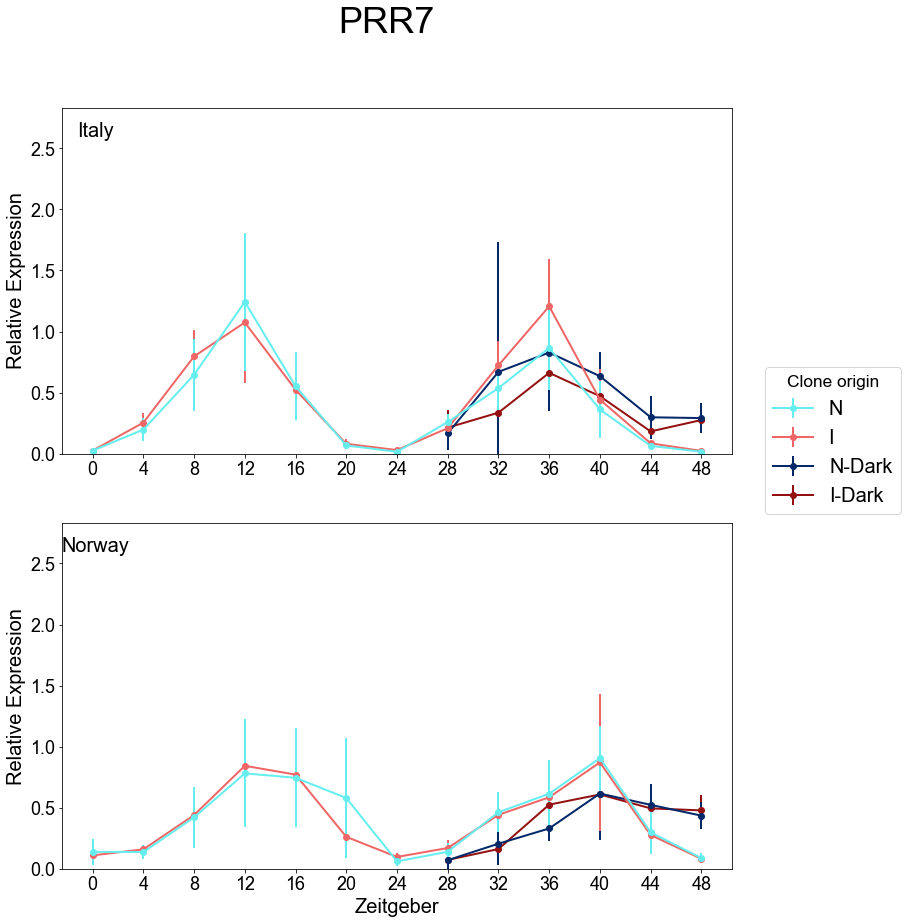

In [109]:
plot_gene_clonegroups(data2, 'PRR7')

In [118]:
display_significant_t_tests(data2, 'PRR7')

Significant difference between Norwegian and Italian treatments for PRR7 by latitudinal origin


Ttest_ind   p-value
zeitgeber Clone_origin                     
0         I              4.196087  0.002320
          N              2.821376  0.025722
4         I             -2.450495  0.039906
8         I             -3.208756  0.010680
20        I              4.217515  0.001779
          N              2.314615  0.045889
24        I              4.045550  0.003707
28        N             -2.922205  0.016971
32        I             -2.634031  0.027178
36        I             -3.372157  0.011885
40        N              3.634708  0.005446
44        I              4.150642  0.003206
          N              3.164319  0.010085
48        I              4.516553  0.001114
          N              4.448189  0.001239

Significant differences between Italian and Norwegian clones for PRR7


,,Ttest_ind,p-value
zeitgeber,treatment,,
24,Italy,3.431946,0.013938
36,D-Norway,2.565645,0.030404


Significant difference between Norwegian and Dark treatments for PRR7 by latitudinal origin


Ttest_ind   p-value
zeitgeber Clone_origin                     
28        I              3.257230  0.009882
32        I              4.456031  0.001586
          N              2.604885  0.026270
36        N              2.373639  0.041660
44        I             -3.235202  0.011963
48        I             -7.380134  0.000042
          N             -7.096726  0.000057

Significant difference between Italian and Dark treatments for PRR7 by latitudinal origin


Ttest_ind   p-value
zeitgeber Clone_origin                     
32        I              3.968291  0.002651
36        I              2.584390  0.032394
44        I             -5.947546  0.000571
          N             -3.188248  0.009683
48        I             -9.730822  0.000010
          N             -5.665815  0.000307

## TOC1

(<Figure size 864x1008 with 2 Axes>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x7fb9525aed10>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7fb942eb81d0>))

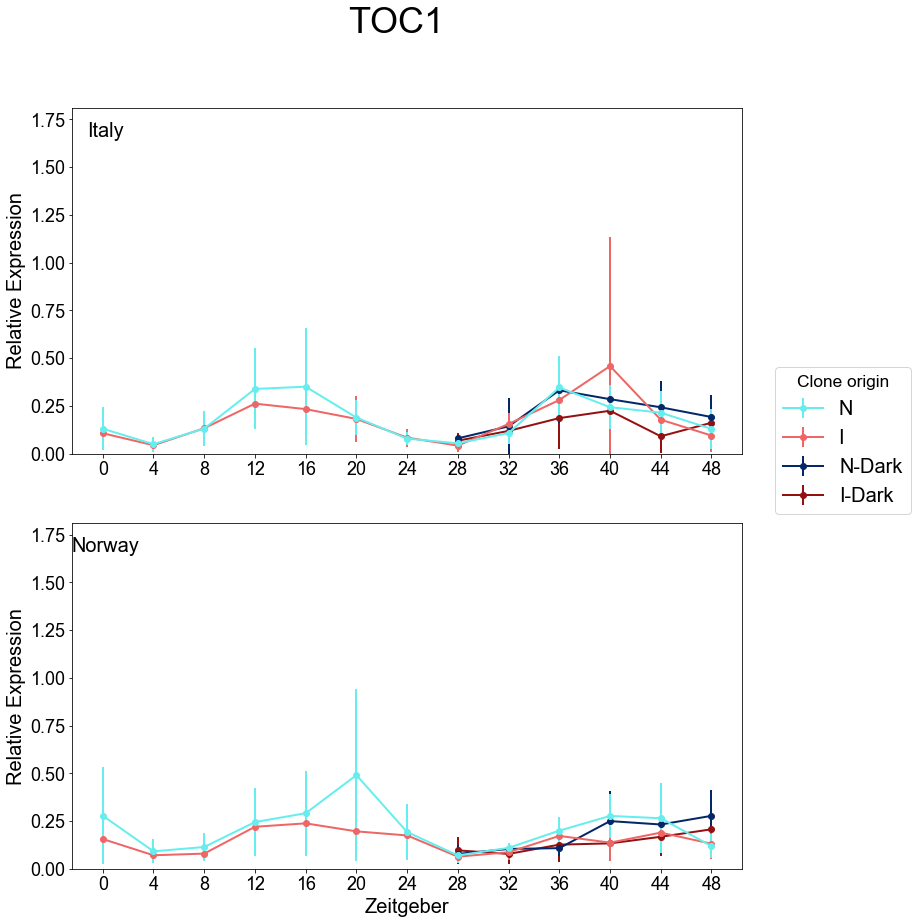

In [119]:
plot_gene_clonegroups(data2, 'TOC1')

In [120]:
display_significant_t_tests(data2, 'TOC1')

Significant difference between Norwegian and Italian treatments for TOC1 by latitudinal origin


,,Ttest_ind,p-value
zeitgeber,Clone_origin,,
8,I,-2.78735,0.019207


Significant differences between Italian and Norwegian clones for TOC1


,,Ttest_ind,p-value
zeitgeber,treatment,,


Significant difference between Norwegian and Dark treatments for TOC1 by latitudinal origin


,,Ttest_ind,p-value
zeitgeber,Clone_origin,,
36,N,2.727248,0.023329
48,N,-2.595524,0.028950


Significant difference between Italian and Dark treatments for TOC1 by latitudinal origin


,,Ttest_ind,p-value
zeitgeber,Clone_origin,,
28,N,-2.301251,0.046903


## LUX

(<Figure size 864x1008 with 2 Axes>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x7fb943003650>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7fb942fbc2d0>))

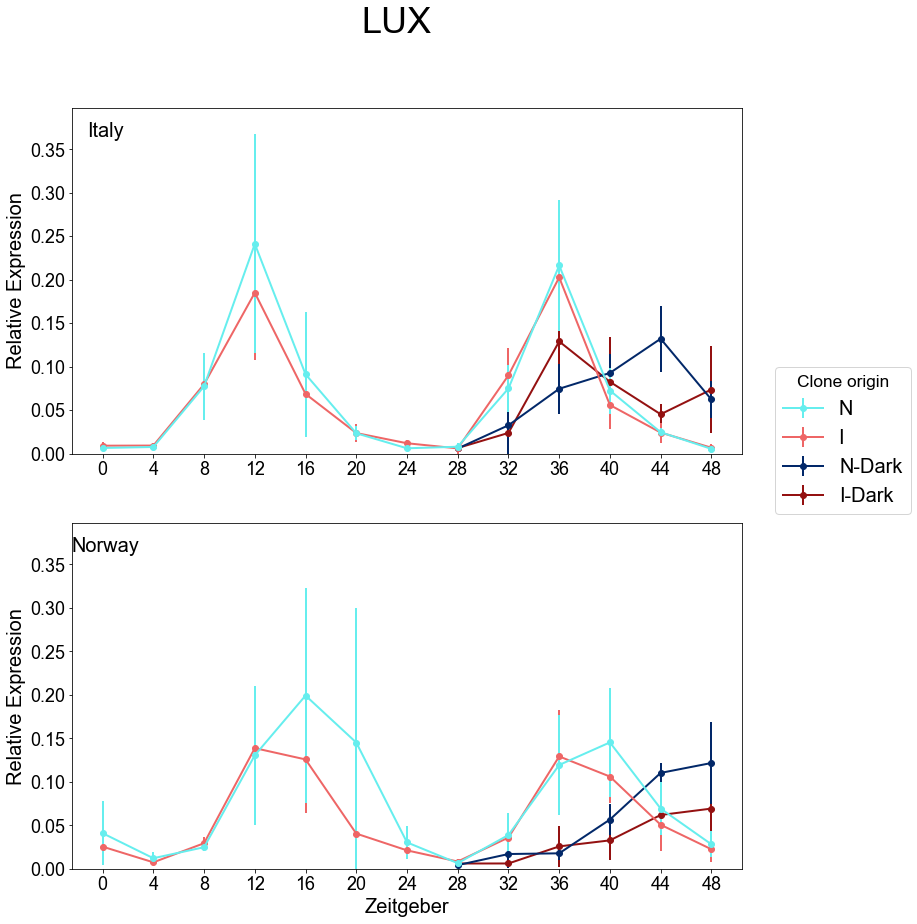

In [121]:
plot_gene_clonegroups(data2, 'LUX')

In [122]:
display_significant_t_tests(data2, 'LUX')

Significant difference between Norwegian and Italian treatments for LUX by latitudinal origin


Ttest_ind   p-value
zeitgeber Clone_origin                     
0         I              3.785477  0.005346
          N              2.321881  0.048776
8         I             -5.642203  0.000317
          N             -3.337162  0.008699
24        N              2.518381  0.039905
32        I             -3.379376  0.008135
          N             -2.291257  0.047676
36        I             -2.466311  0.043065
          N             -2.354005  0.043022
40        I              2.839388  0.019423
          N              2.593628  0.029040
44        N              3.500724  0.005720
48        I              2.509689  0.030929
          N              3.623406  0.004663

Significant differences between Italian and Norwegian clones for LUX


Ttest_ind   p-value
zeitgeber treatment                     
24        Italy       2.630628  0.039027
44        D-Italy    -3.731456  0.007345
          D-Norway   -3.175241  0.011271

Significant difference between Norwegian and Dark treatments for LUX by latitudinal origin


Ttest_ind   p-value
zeitgeber Clone_origin                     
32        I              4.090019  0.002717
36        I              3.990430  0.004003
          N              4.344913  0.001864
40        I              4.276419  0.002701
          N              3.037964  0.016113
44        N             -3.059842  0.012048
48        I             -2.359532  0.042634
          N             -4.613748  0.001266

Significant difference between Italian and Dark treatments for LUX by latitudinal origin


Ttest_ind   p-value
zeitgeber Clone_origin                     
32        I              4.528904  0.001093
36        N              4.296494  0.001570
44        I             -2.484227  0.047532
          N             -6.828793  0.000046
48        I             -3.366560  0.009836
          N             -6.459524  0.000117

## PRDX

(<Figure size 864x1008 with 2 Axes>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x7fb9437cec90>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7fb943921590>))

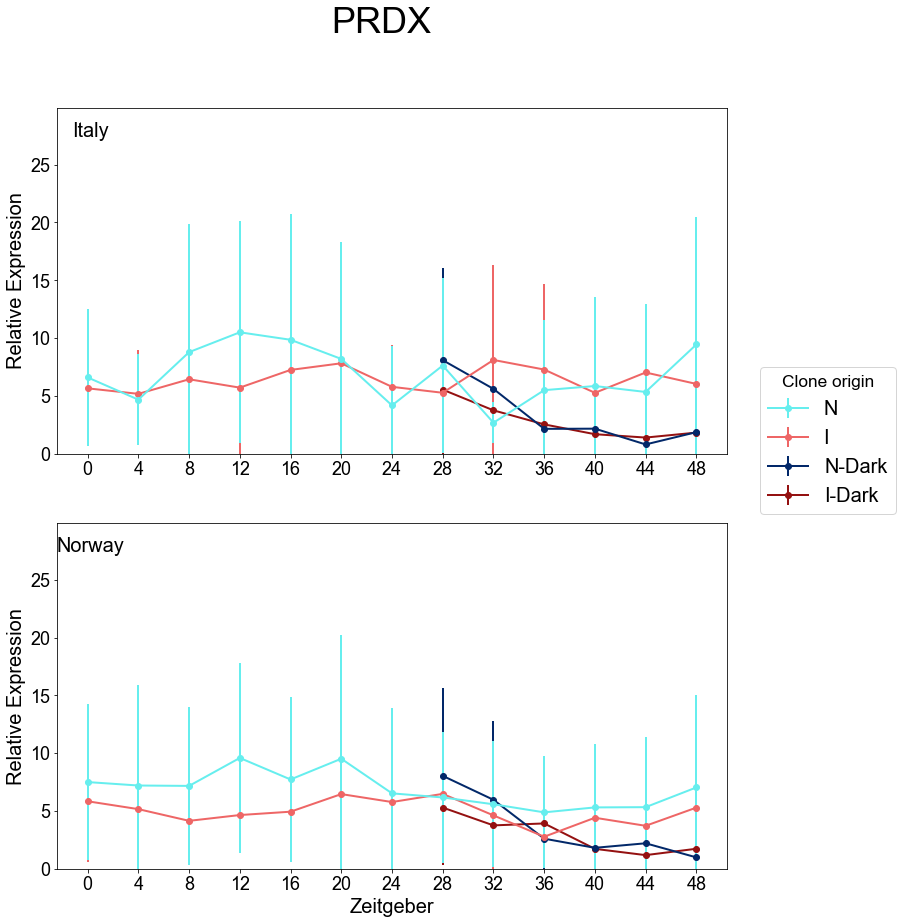

In [123]:
plot_gene_clonegroups(data2, 'PRDX')

In [124]:
display_significant_t_tests(data2, 'PRDX')

Significant difference between Norwegian and Italian treatments for PRDX by latitudinal origin


,,Ttest_ind,p-value
zeitgeber,Clone_origin,,


Significant differences between Italian and Norwegian clones for PRDX


,,Ttest_ind,p-value
zeitgeber,treatment,,


Significant difference between Norwegian and Dark treatments for PRDX by latitudinal origin


,,Ttest_ind,p-value
zeitgeber,Clone_origin,,
44,I,2.497742,0.037072


Significant difference between Italian and Dark treatments for PRDX by latitudinal origin


,,Ttest_ind,p-value
zeitgeber,Clone_origin,,


## PRR5

(<Figure size 864x1008 with 2 Axes>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x7fb943a06950>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7fb943f18210>))

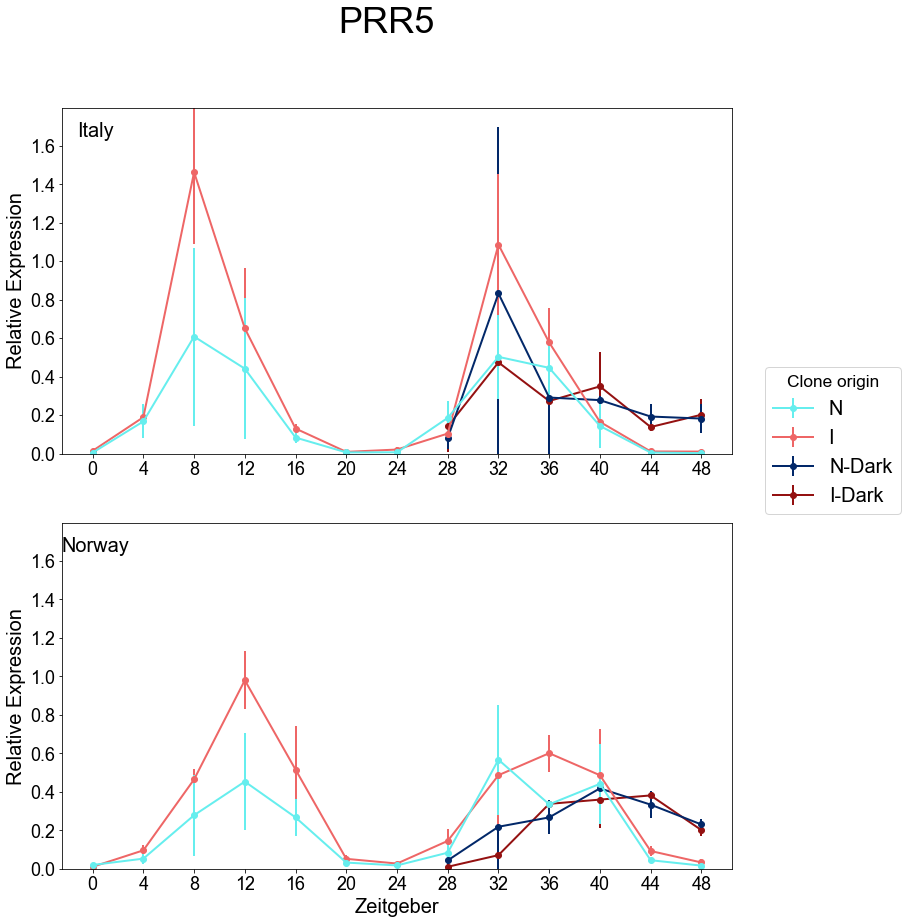

In [125]:
plot_gene_clonegroups(data2, 'PRR5')

In [126]:
display_significant_t_tests(data2, 'PRR5')

Significant difference between Norwegian and Italian treatments for PRR5 by latitudinal origin


/Users/corinefaehn/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/corinefaehn/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Ttest_ind   p-value
zeitgeber Clone_origin                     
4         I             -4.628781  0.018990
8         I             -4.558572  0.010350
16        I              2.921407  0.043183
          N              3.338021  0.044453
20        I              3.794865  0.019188
          N              3.111092  0.035834
44        N              5.941193  0.004025

/Users/corinefaehn/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/corinefaehn/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Significant differences between Italian and Norwegian clones for PRR5


,,Ttest_ind,p-value
zeitgeber,treatment,,
36,Norway,3.664038,0.035146
44,Italy,3.386919,0.042872


Significant difference between Norwegian and Dark treatments for PRR5 by latitudinal origin


Ttest_ind   p-value
zeitgeber Clone_origin                     
28        I              4.180421  0.024939
36        I              3.633585  0.035903
44        I            -14.832554  0.000665
          N             -6.955672  0.002245
48        I             -7.771616  0.004432
          N            -13.219082  0.000189

Significant difference between Italian and Dark treatments for PRR5 by latitudinal origin


Ttest_ind   p-value
zeitgeber Clone_origin                     
44        I             -8.516512  0.013508
          N             -4.795367  0.008677
48        I             -4.284349  0.023366
          N             -4.179587  0.013923